In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import ee
import geemap
Map= geemap.Map()

In [2]:
lake=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALTM_ALAP_Sta_coordinates')

In [3]:
print(lake.size().getInfo())
print(lake.aggregate_array('Name').distinct().getInfo())
print(lake.first().propertyNames().getInfo())

199
['Eighth Lake', 'Fawn Lake', 'Fifth Lake', 'Fourth Lake', 'Heavens Lake', 'Lake Algonquin', 'Lake Eaton', 'Lake Madeleine', 'Lake Placid', 'Lake Pleasant', 'Lower St. Regis Lake', 'Morehouse Lake', 'Oxbow Lake', 'Sacandaga Lake', 'Seventh Lake', 'Spitfire Lake', 'Spy Lake', 'Upper St. Regis Lake', 'Barnes Lake', 'Big Hope Pond', 'Brook Trout Lake', 'Constable Pond', 'Grass Pond (3)', 'Little Echo Pond', 'Loon Hollow Pond', 'Otter Lake', 'Sochia Pond', 'South Lake (East Branch)', 'Squash Pond', 'Sunday Pond', 'West Pond', 'Willis Lake', 'Windfall Pond', 'Middle Pond*', 'Carry Pond', 'Little Clear Pond', 'Little Hope Pond*', 'Heart Lake', 'Limekiln Lake', 'Avalanche Lake', 'Cascade Lake', 'Grass Pond', 'Little Simon Pond*', 'Long Pond', 'Nate Pond*', 'Raquette Lake Reservoir*', 'Sagamore Lake*', 'Lake Rondaxe', 'Dart Lake', 'G Lake', 'Indian Lake', 'Jockeybush Lake', 'Lake Colden', 'Lost Pond*', 'Middle Branch Lake', 'Middle Settlement Lake', 'North Lake', 'Queer Lake', 'Squaw Lake',

In [4]:
# Function to create a five-sided polygon around the latitude and longitude
import ee
import geemap

# Function to create a five-sided polygon around the latitude and longitude
def create_lake_polygon(lat, lon):
    # Assuming each pixel is approximately 20 meters in size
    buffer_distance_meters = 3 * 20

    
    # Convert buffer distance from meters to degrees (approximate conversion)
    buffer_distance_degrees = buffer_distance_meters / 111320.0

    # Define the coordinates of the five vertices of the polygon
    coordinates = [
        [lon, lat + buffer_distance_degrees],
        [lon + buffer_distance_degrees, lat + buffer_distance_degrees / 2],
        [lon + buffer_distance_degrees / 2, lat - buffer_distance_degrees / 2],
        [lon - buffer_distance_degrees / 2, lat - buffer_distance_degrees / 2],
        [lon - buffer_distance_degrees, lat + buffer_distance_degrees / 2]
    ]

    # Create the polygon geometry
    polygon = ee.Geometry.Polygon(coordinates)

    return polygon

In [5]:
all_lakes=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALAP-ALTM-Lakes-195')
Map.addLayer(all_lakes)
Map.centerObject(all_lakes,16)
Map

Map(center=[44.06877752167093, -74.34748015610103], controls=(WidgetControl(options=['position', 'transparent_…

In [6]:
lake=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALTM_ALAP_Sta_coordinates')\
        .filter(ee.Filter.eq('Name', 'Big Moose Lake'))
lat = ee.Number(lake.first().geometry().coordinates().get(1)).getInfo()
lon = ee.Number(lake.first().geometry().coordinates().get(0)).getInfo()
lake_polygon = ee.Geometry.Point(lon, lat).buffer(100)
Map.addLayer(lake_polygon)
Map.centerObject(lake_polygon,16)
Map

Map(center=[43.83220986995713, -74.84650167925649], controls=(WidgetControl(options=['position', 'transparent_…

In [7]:
# Import necessary libraries
import ee
import geemap

# Initialize Earth Engine
ee.Initialize()

# Create a feature for the specific lake you're interested in
lake = ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALTM_ALAP_Sta_coordinates') \
    .filter(ee.Filter.eq('Name', 'Lost Pond'))

# Get the coordinates of the point
lat = ee.Number(lake.first().geometry().coordinates().get(1))
lon = ee.Number(lake.first().geometry().coordinates().get(0))

# Create a buffer around the point
lake_polygon = ee.Geometry.Point(lon, lat).buffer(100)



In [8]:
ee.Initialize()

lake_names = ['Eighth Lake', 'Fawn Lake', 'Fifth Lake', 'Fourth Lake', 'Heavens Lake', 'Lake Algonquin', 'Lake Eaton', 'Lake Madeleine', 'Lake Placid', 'Lake Pleasant', 'Lower St. Regis Lake', 'Morehouse Lake', 'Oxbow Lake', 'Sacandaga Lake', 'Seventh Lake', 'Spitfire Lake', 'Spy Lake', 'Upper St. Regis Lake', 'Barnes Lake', 'Big Hope Pond', 'Brook Trout Lake', 'Constable Pond', 'Grass Pond (3)', 'Little Echo Pond', 'Loon Hollow Pond', 'Otter Lake', 'Sochia Pond', 'South Lake (East Branch)', 'Squash Pond', 'Sunday Pond', 'West Pond', 'Willis Lake', 'Windfall Pond', 'Middle Pond*', 'Carry Pond', 'Little Clear Pond', 'Little Hope Pond*', 'Heart Lake', 'Limekiln Lake', 'Avalanche Lake', 'Cascade Lake', 'Grass Pond', 'Little Simon Pond*', 'Long Pond', 'Nate Pond*', 'Raquette Lake Reservoir*', 'Sagamore Lake*', 'Lake Rondaxe', 'Dart Lake', 'G Lake', 'Indian Lake', 'Jockeybush Lake', 'Lake Colden', 'Lost Pond*', 'Middle Branch Lake', 'Middle Settlement Lake', 'North Lake', 'Queer Lake', 'Squaw Lake', 'Willys Lake', 'Woods Lake', 'Owen Pond', 'Amber Lake', 'Lake of the Pines', 'Lake Roxanne', 'Alford Pond', 'Augur Lake', 'Austin Pond', 'Big Cherry Patch Pond', 'Butternut Pond', "Chase's Lake", 'Cranberry Lake', 'Echo Lake', 'Eli Pond', 'Fern Lake', 'Fish Creek East', 'Fish Creek Pond', 'Fish Creek West', 'Floodwood Pond', 'Franklin Falls Reservoir', 'Green Lake', 'Green Pond', 'Hidden Lake', 'Highlands Forge Lake', 'Horseshoe Pond', 'Indian Lake- Franklin County', 'Indian Lake- Hamilton County', 'Irving Pond', 'Jabe Pond', 'Jordan Lake', 'Lake Abanakee', 'Lake Adirondack', 'Lake Alice 2', 'Lake Colby', 'Lake Everest', 'Lake Flower', 'Lake Titus', 'Lens Lake', 'Little Polliwog Pond', 'Little Rainbow Pond', 'Little Square Pond', 'Long Pond- Essex County', 'Long Pond- Franklin County', 'Loon Lake- Warren County', 'Lower Ausable Lake', 'Lower Beaver Pond', 'Lower Chateaugay Lake', 'McCauley Pond', 'Middle Saranac Lake', 'Moody Pond', 'Mountain View Lake', 'Oseetah Lake', 'Osgood Pond', 'Otter Pond', 'Owl Pond', 'Penfield Pond', 'Putnam Pond', 'Ragged Lake', 'Rainbow Lake', 'Rat Pond', 'Rollins Pond', 'Rush Pond', 'Slang Pond', 'Trout Pond', 'Union Falls Reservoir', 'Upper Chateaugay Lake', 'Upper Saranac Lake', 'Whey Pond', 'Windover Lake', 'Hewitt Lake', 'Bartlett Pond', 'Blue Mountain Lake', 'Bone Pond', 'Brandreth Lake', 'Canada Lake', 'Catlin Lake', 'Chapel Pond', 'Chazy Lake', 'Connery Pond', 'Deer Lake', 'Eagle Lake', 'East Caroga Lake', 'East Pine Pond', 'Follensby Clear Pond', 'Frank Pond', 'Friends Lake', 'Garnet Lake', 'Gordon Pond', 'Gull Pond', 'Hoel Pond', 'Holcomb Pond', 'Kiwassa Lake', 'Lake Alice', 'Lake Clear', 'Lake Durant', 'Lake Kushaqua', 'Little Green Pond', 'Little Jabe Pond', 'Little Long Lake', 'Long Lake', 'Loon Lake- Franklin County', 'Lower Cascade Lake', 'Lower Saranac Lake', 'Mink Pond', 'Mirror Lake', 'Moose Pond', 'Paradox Lake', 'Pine Lake', 'Pine Pond', 'Pleasant Lake', 'Polliwog Pond', 'Raquette Lake', 'Rich Lake', 'Round Pond', 'Schroon Lake', 'Silver Lake', 'Simon Pond', 'Split Rock Pond', 'Star Lake', 'Stony Creek Pond', 'Taylor Pond', 'Thirteenth Lake', 'Tripp Lake', 'Trout Lake', 'Tupper Lake', 'Turtle Pond', 'Twitchell Lake', 'Upper Ausable Lake', 'Upper Cascade Lake', 'West Caroga Lake', 'White Lake', 'Wolf Lake', 'Zack Pond',
              'Copperas Pond', 'Arbutus Pond', 'Moss Lake', 'Big Moose Lake', 'Black Pond', 'Clear Pond']


# Define the Landsat 5 bands and their corresponding standard names
LC5_BANDS = ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7', 'ST_B6', 'QA_PIXEL']
LC8_BANDS = ['SR_B2','SR_B3','SR_B4',  'SR_B5','SR_B6','SR_B7','SR_B1','ST_B10','QA_PIXEL']; #Landsat 8
STD_NAMES = ['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'aerosoul','temp', 'QA']

all_lakes=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALAP-ALTM-Lakes-195')



# Define a function to mask clouds and cloud shadows from Landsat 5 surface reflectance imagery
def maskL457sr(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)

    qa_values_to_filter = [5440, 5442, 5696, 13664]

    mask = image.select('QA_PIXEL').eq(qa_values_to_filter[0])
    for qa_value in qa_values_to_filter[1:]:
        mask = mask.Or(image.select('QA_PIXEL').eq(qa_value))

    filtered_image = image.updateMask(mask)

    opticalBands = filtered_image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBand = filtered_image.select('ST_B6').multiply(0.00341802).add(-124.15)
    return filtered_image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask).clip(all_lakes)


def maskL8sr(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    
    # Specify the QA values to filter
    qa_values_to_filter = [21824, 21826, 22080, 23888,30048,54596,54852,21952]

    mask = image.select('QA_PIXEL').eq(qa_values_to_filter[0])
    for qa_value in qa_values_to_filter[1:]:
        mask = mask.Or(image.select('QA_PIXEL').eq(qa_value))

    # Apply the mask to filter the image
    filtered_image = image.updateMask(mask)
     # Apply the scaling factors to the appropriate bands.
    opticalBands = filtered_image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBands = filtered_image.select('ST_B.*').multiply(0.00341802).add(-124.15)

    # Replace the original bands with the scaled ones and apply the masks.
    return filtered_image.addBands(opticalBands, None, True) \
        .addBands(thermalBands, None, True) \
        .updateMask(qaMask) \
        .updateMask(saturationMask)\
        .clip(all_lakes)



# Define a function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake):
    reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake_polygon, scale=30).select(STD_NAMES)
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)

# Initialize an empty list to store the dataframes for each lake
dfs = []

# Create a dictionary to map each lake name to a numerical label
lake_name_to_label = {lake_name: i for i, lake_name in enumerate(lake_names)}

# # Function to normalize specific bands within the image
# def normalize_image(image):
#     # Select the bands you want to normalize
#     bands_to_normalize = image.select(['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'temp'])  # Replace with your band names
    
#     # Normalize the selected bands within the image
#     normalized_bands = bands_to_normalize.divide(10000)  # Assuming Landsat 8, so max DN value is 10,000
    
#     # Combine the normalized bands with the original image
#     normalized_image = image.addBands(normalized_bands, None, True)
    
#     return normalized_image

# Loop through each lake name and retrieve Landsat 5 imagery for that lake
for SITE_NAME in lake_names:
    # Retrieve the lake using the filter
    lake=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALTM_ALAP_Sta_coordinates')\
         .filter(ee.Filter.eq('Name', SITE_NAME))

   
    # Get the latitude and longitude of the station point
    lat = ee.Number(lake.first().geometry().coordinates().get(1)).getInfo()
    lon = ee.Number(lake.first().geometry().coordinates().get(0)).getInfo()

     # Create a polygon around the station point using the latitude and longitude
    #lake_polygon = create_lake_polygon(lon, lat).buffer(1000)
    lake_polygon = ee.Geometry.Point(lon, lat).buffer(100)

    # Retrieve Landsat 5 imagery for the specific lake
    l5 = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2') \
        .filter(ee.Filter.calendarRange(5, 12, 'month')) \
        .filter(ee.Filter.calendarRange(1985, 2011, 'year')) \
        .filterBounds(lake_polygon) \
        .filter(ee.Filter.lt('CLOUD_COVER', 15)) \
        .map(maskL457sr) \
        .select(LC5_BANDS, STD_NAMES)

    l8 =ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
            .filter(ee.Filter.calendarRange(5, 11, 'month')) \
            .filterBounds(lake_polygon) \
            .filter(ee.Filter.lt('CLOUD_COVER', 15)) \
            .map(maskL8sr) \
            .select(LC8_BANDS, STD_NAMES)
        
    # #merge landsat 5 and landsat 8
    # lall = ee.ImageCollection(l5.merge(l8));
    
    # lall_normalized= lall.map(normalize_image)

    # Map the reflectance function over the Landsat 5 ImageCollection for the specific lake
    map_reflectance = l8.map(lambda img: reflectance(img, lake_polygon))

    # Reduce the mapped image collection to get reflectance values for the specific lake
    list_reflectance = map_reflectance.reduceColumns(ee.Reducer.toList(2), ['DATE_SMP', 'reflectance']).values().get(0)

    # Convert the results to a pandas DataFrame
    df_reflectance = pd.DataFrame(list_reflectance.getInfo(), columns=['DATE_SMP', 'reflectance'])
    df_reflectance['DATE_SMP'] = pd.to_datetime(df_reflectance['DATE_SMP'])
    df_reflectance['DATE_SMP'] = df_reflectance['DATE_SMP'].dt.date
    df_reflectance['reflectance'] = df_reflectance['reflectance'].apply(lambda x: {k: v for k, v in x.items() if v is not None})

    # Unpack the 'reflectance' dictionary and create separate columns for each band
    df_reflectance = pd.concat([df_reflectance.drop('reflectance', axis=1),
                                df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)

    # Add a new column for the lake name
    df_reflectance['SITE_NAME'] = SITE_NAME

    # Add a new column for the lake label (numeric representation)
    df_reflectance['LAKE_LABEL'] = lake_name_to_label[SITE_NAME]

    # Add the DataFrame to the list
    dfs.append(df_reflectance)


# Concatenate all DataFrames into a single DataFrame
df_all_lakes = pd.concat(dfs, ignore_index=True)

# Sort the DataFrame by 'DATE_SMP' in ascending order
df_all_lakes.sort_values(by='DATE_SMP', inplace=True)

df_all_lakes.dropna(inplace=True)

df_all_lakes

#36361 rows × 11 columns

,DATE_SMP,QA,aerosoul,blue,green,nir,red,swir1,swir2,temp,SITE_NAME,LAKE_LABEL
0,2013-05-16,21952.000000,0.003294,0.004578,0.007558,0.006159,0.003509,0.005849,0.004890,12.903985,Eighth Lake,0
8864,2013-05-16,21923.064398,0.016447,0.017302,0.027826,0.033236,0.021820,0.022991,0.015441,19.129863,Rush Pond,121
12885,2013-05-16,21952.000000,0.008502,0.010385,0.013465,0.010401,0.007839,0.008733,0.007290,14.027188,Split Rock Pond,177
8533,2013-05-16,21836.999181,-0.017036,-0.003824,0.023495,0.070665,0.020172,0.049305,0.035508,15.020865,Putnam Pond,116
8464,2013-05-16,21922.351601,0.023283,0.025494,0.032458,0.039288,0.029960,0.026177,0.021354,17.286472,Penfield Pond,115
...,...,...,...,...,...,...,...,...,...,...,...,...
9863,2023-10-03,21952.000000,0.000195,0.001512,0.005809,0.007487,0.003044,0.004719,0.003344,21.585695,Catlin Lake,135
4078,2023-10-03,21947.100329,0.001706,0.005209,0.011787,0.018608,0.008296,0.011317,0.006222,20.345085,G Lake,49
714,2023-10-03,21952.000000,0.004344,0.007999,0.014757,0.023277,0.010784,0.014121,0.009477,18.379547,Lake Madeleine,7
9658,2023-10-03,21952.000000,0.007258,0.008648,0.011016,0.011713,0.007096,0.005807,0.003376,19.796429,Brandreth Lake,133


In [9]:
df_all_lakes['SITE_NAME'] = df_all_lakes['SITE_NAME'].str.replace('*', '')
df_all_lakes

,DATE_SMP,QA,aerosoul,blue,green,nir,red,swir1,swir2,temp,SITE_NAME,LAKE_LABEL
0,2013-05-16,21952.000000,0.003294,0.004578,0.007558,0.006159,0.003509,0.005849,0.004890,12.903985,Eighth Lake,0
8864,2013-05-16,21923.064398,0.016447,0.017302,0.027826,0.033236,0.021820,0.022991,0.015441,19.129863,Rush Pond,121
12885,2013-05-16,21952.000000,0.008502,0.010385,0.013465,0.010401,0.007839,0.008733,0.007290,14.027188,Split Rock Pond,177
8533,2013-05-16,21836.999181,-0.017036,-0.003824,0.023495,0.070665,0.020172,0.049305,0.035508,15.020865,Putnam Pond,116
8464,2013-05-16,21922.351601,0.023283,0.025494,0.032458,0.039288,0.029960,0.026177,0.021354,17.286472,Penfield Pond,115
...,...,...,...,...,...,...,...,...,...,...,...,...
9863,2023-10-03,21952.000000,0.000195,0.001512,0.005809,0.007487,0.003044,0.004719,0.003344,21.585695,Catlin Lake,135
4078,2023-10-03,21947.100329,0.001706,0.005209,0.011787,0.018608,0.008296,0.011317,0.006222,20.345085,G Lake,49
714,2023-10-03,21952.000000,0.004344,0.007999,0.014757,0.023277,0.010784,0.014121,0.009477,18.379547,Lake Madeleine,7
9658,2023-10-03,21952.000000,0.007258,0.008648,0.011016,0.011713,0.007096,0.005807,0.003376,19.796429,Brandreth Lake,133


In [10]:
# from sklearn.preprocessing import MinMaxScaler

# # Initialize the MinMaxScaler with the desired feature range
# scaler = MinMaxScaler(feature_range=(0, 1))

# # List of bands you want to normalize
# bands_to_normalize = ['blue', 'green', 'nir', 'red', 'swir1', 'swir2', 'temp']

# # Normalize the selected columns
# df_all_lakes[bands_to_normalize] = scaler.fit_transform(df_all_lakes[bands_to_normalize])

# # The selected columns have been normalized to the range [0, 1]


In [11]:
df_all_lakes

,DATE_SMP,QA,aerosoul,blue,green,nir,red,swir1,swir2,temp,SITE_NAME,LAKE_LABEL
0,2013-05-16,21952.000000,0.003294,0.004578,0.007558,0.006159,0.003509,0.005849,0.004890,12.903985,Eighth Lake,0
8864,2013-05-16,21923.064398,0.016447,0.017302,0.027826,0.033236,0.021820,0.022991,0.015441,19.129863,Rush Pond,121
12885,2013-05-16,21952.000000,0.008502,0.010385,0.013465,0.010401,0.007839,0.008733,0.007290,14.027188,Split Rock Pond,177
8533,2013-05-16,21836.999181,-0.017036,-0.003824,0.023495,0.070665,0.020172,0.049305,0.035508,15.020865,Putnam Pond,116
8464,2013-05-16,21922.351601,0.023283,0.025494,0.032458,0.039288,0.029960,0.026177,0.021354,17.286472,Penfield Pond,115
...,...,...,...,...,...,...,...,...,...,...,...,...
9863,2023-10-03,21952.000000,0.000195,0.001512,0.005809,0.007487,0.003044,0.004719,0.003344,21.585695,Catlin Lake,135
4078,2023-10-03,21947.100329,0.001706,0.005209,0.011787,0.018608,0.008296,0.011317,0.006222,20.345085,G Lake,49
714,2023-10-03,21952.000000,0.004344,0.007999,0.014757,0.023277,0.010784,0.014121,0.009477,18.379547,Lake Madeleine,7
9658,2023-10-03,21952.000000,0.007258,0.008648,0.011016,0.011713,0.007096,0.005807,0.003376,19.796429,Brandreth Lake,133


In [12]:
# Remove duplicates in the 'SITE_NAME' column
unique_lake_names = df_all_lakes['SITE_NAME'].drop_duplicates()

# Count the number of unique lake names
num_unique_lakes = unique_lake_names.nunique()

# Print the unique lake names and the count
print(f"Number of Unique Lakes: {num_unique_lakes}")

#output:Number of Unique Lakes: 199
#after dropping null values the lakes are still 199

Number of Unique Lakes: 196


In [13]:
import pandas as pd


# Read the Excel file
data_excel = pd.read_excel("LTM_Data_2023_3_9 (2).xlsx", usecols=['DOC_MG_L', 'SITE_ID', 'DATE_SMP', 'SAMPLE_LOCATION'])
data_excel_site = pd.read_excel("Site_Information_2022_8_1 (2).xlsx", usecols=['SITE_ID', 'PROGRAM_ID', 'SITE_NAME','LAKE_DEPTH_MEAN'])

data_second_sheet_COORD = pd.read_excel("ALTM-50-stations (1).xlsx",
                                 sheet_name='updated station coordinates', usecols=['SITE_ID', 'LATDD', 'LONDD','LATDD_CENT','LONDD_CENT','SITE_NAME'])

# Merge the two DataFrames based on the common column 'SITE_ID'
merged_data_excel = pd.merge(data_excel, data_excel_site, on=['SITE_ID'])
merged_data_combined = pd.merge(merged_data_excel, data_second_sheet_COORD, on=['SITE_ID', 'SITE_NAME'])

data_modified = merged_data_combined.drop(columns=['SAMPLE_LOCATION'])


#pd.set_option('display.max_rows', None)
# Display the merged DataFrame
(data_modified)


,SITE_ID,DATE_SMP,DOC_MG_L,PROGRAM_ID,SITE_NAME,LAKE_DEPTH_MEAN,LATDD,LONDD,LATDD_CENT,LONDD_CENT
0,040850,1997-09-22,3.100000,LTM_ALTM,Squaw Lake,3.4,43.63645,-74.73844,43.63276,-74.73863
1,040850,1997-09-22,3.100000,LTM_ME,Squaw Lake,3.4,43.63645,-74.73844,43.63276,-74.73863
2,040850,1995-03-02,3.031000,LTM_ALTM,Squaw Lake,3.4,43.63645,-74.73844,43.63276,-74.73863
3,040850,1995-03-02,3.031000,LTM_ME,Squaw Lake,3.4,43.63645,-74.73844,43.63276,-74.73863
4,040850,1996-08-19,3.595000,LTM_ALTM,Squaw Lake,3.4,43.63645,-74.73844,43.63276,-74.73863
...,...,...,...,...,...,...,...,...,...,...
17863,1A3-048,2011-05-18,4.283944,LTM_ALTM,Grass Pond,1.5,43.69066,-75.06462,43.69207,-75.06172
17864,1A3-048,2015-06-10,5.509394,LTM_ALTM,Grass Pond,1.5,43.69066,-75.06462,43.69207,-75.06172
17865,1A3-048,2016-07-14,4.884900,LTM_ALTM,Grass Pond,1.5,43.69066,-75.06462,43.69207,-75.06172
17866,1A3-048,2016-09-15,6.344000,LTM_ALTM,Grass Pond,1.5,43.69066,-75.06462,43.69207,-75.06172


In [14]:
data_ALAP = pd.read_excel("AWI-ADK.xlsx", usecols=['AWI Site ID', 'AWI Waterbody ID', 'Waterbody Name', 'Parameter','Sample Date','Reported Value','Units'])
doc_data = data_ALAP[data_ALAP['Parameter'] == 'Dissolved Organic Carbon']


doc_data

,AWI Site ID,AWI Waterbody ID,Waterbody Name,Sample Date,Parameter,Reported Value,Units
62,AWI00001.1,AWI00001,Lower St. Regis Lake,2017-06-21,Dissolved Organic Carbon,4.510,mg/L
65,AWI00001.1,AWI00001,Lower St. Regis Lake,2017-07-21,Dissolved Organic Carbon,6.060,mg/L
68,AWI00001.1,AWI00001,Lower St. Regis Lake,2017-08-03,Dissolved Organic Carbon,6.110,mg/L
71,AWI00001.1,AWI00001,Lower St. Regis Lake,2017-08-30,Dissolved Organic Carbon,5.970,mg/L
74,AWI00001.1,AWI00001,Lower St. Regis Lake,2017-09-27,Dissolved Organic Carbon,5.600,mg/L
...,...,...,...,...,...,...,...
8720,AWI00318.1,AWI00318,Green Lake,2022-07-20,Dissolved Organic Carbon,2.671,mg/L
8723,AWI00318.1,AWI00318,Green Lake,2022-08-15,Dissolved Organic Carbon,2.782,mg/L
8726,AWI00319.1,AWI00319,Ragged Lake,2022-08-12,Dissolved Organic Carbon,11.710,mg/L
8729,AWI00319.1,AWI00319,Ragged Lake,2022-09-17,Dissolved Organic Carbon,11.500,mg/L


In [15]:
alap_data= pd.read_excel("ALAP_DATA (1).xlsx")
alap_data.rename(columns={'LAKE_NAME': 'Waterbody Name'}, inplace=True)
alap_data = alap_data[~alap_data.applymap(lambda x: isinstance(x, (str, bytes)) and '-' in x).any(axis=1)]

alap_data

,WATERBODY_ID,Waterbody Name,LAT,LON,LAKE_DEPTH (m),SURFACE_AREA (ha),TROPHIC_STATE
0,AWI00001,Lower St. Regis Lake,44.427034,-74.248048,11.6,NaN,Mesotrophic
1,AWI00002,Spitfire Lake,44.417981,-74.269630,9.4,NaN,Mesotrophic
2,AWI00003,Upper St. Regis Lake,44.408394,-74.285134,20.1,NaN,Mesotrophic
3,AWI00004,Butternut Pond,44.430696,-73.495663,6.3,65.8,Oligotrophic
4,AWI00006,Osgood Pond,44.451070,-74.228505,4.6,108.0,Mesotrophic
...,...,...,...,...,...,...,...
157,AWI00262,Whey Pond,44.307694,-74.392854,6.1,47.4,Mesotrophic
158,AWI00263,West Caroga Lake,43.137154,-74.495462,21.3,129.0,Oligotrophic
160,AWI00317,Bartlett Pond,44.106152,-73.511043,6.1,40.0,Oligotrophic
161,AWI00318,Green Lake,43.175716,-74.506639,16.7,NaN,Oligotrophic


In [16]:
merged_alap_excel = pd.merge(doc_data, alap_data, on=['Waterbody Name'])
merged_alap_excel.rename(columns={'AWI Waterbody ID': 'SITE_ID' }, inplace=True)
merged_alap_excel.rename(columns={'Waterbody Name': 'SITE_NAME' }, inplace=True)
merged_alap_excel.rename(columns={'Reported Value': 'DOC_MG_L'}, inplace=True)
merged_alap_excel.rename(columns={'LAKE_DEPTH (m)': 'LAKE_DEPTH_MEAN'}, inplace=True)
merged_alap_excel.rename(columns={'Sample Date': 'DATE_SMP'}, inplace=True)
merged_alap_excel = merged_alap_excel[~merged_alap_excel.applymap(lambda x: isinstance(x, (str, bytes)) and '-' in x).any(axis=1)]

selected_columns_alap = merged_alap_excel[['SITE_ID', 'DATE_SMP', 'DOC_MG_L', 'SITE_NAME', 'LAKE_DEPTH_MEAN']]
selected_columns_alap


,SITE_ID,DATE_SMP,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN
0,AWI00001,2017-06-21,4.510,Lower St. Regis Lake,11.6
1,AWI00001,2017-07-21,6.060,Lower St. Regis Lake,11.6
2,AWI00001,2017-08-03,6.110,Lower St. Regis Lake,11.6
3,AWI00001,2017-08-30,5.970,Lower St. Regis Lake,11.6
4,AWI00001,2017-09-27,5.600,Lower St. Regis Lake,11.6
...,...,...,...,...,...
1571,AWI00317,2022-08-16,4.685,Bartlett Pond,6.1
1572,AWI00317,2022-09-20,4.532,Bartlett Pond,6.1
1573,AWI00319,2022-08-12,11.710,Ragged Lake,15.2
1574,AWI00319,2022-09-17,11.500,Ragged Lake,15.2


In [17]:
selected_columns_ALTM = data_modified[['SITE_ID', 'DATE_SMP', 'DOC_MG_L', 'SITE_NAME', 'LAKE_DEPTH_MEAN']]

# Divide the 'LAKE_DEPTH_MEAN' column by 100
# selected_columns_ALTM['LAKE_DEPTH_MEAN'] = selected_columns_ALTM['LAKE_DEPTH_MEAN'] / 1000

selected_columns_ALTM

,SITE_ID,DATE_SMP,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN
0,040850,1997-09-22,3.100000,Squaw Lake,3.4
1,040850,1997-09-22,3.100000,Squaw Lake,3.4
2,040850,1995-03-02,3.031000,Squaw Lake,3.4
3,040850,1995-03-02,3.031000,Squaw Lake,3.4
4,040850,1996-08-19,3.595000,Squaw Lake,3.4
...,...,...,...,...,...
17863,1A3-048,2011-05-18,4.283944,Grass Pond,1.5
17864,1A3-048,2015-06-10,5.509394,Grass Pond,1.5
17865,1A3-048,2016-07-14,4.884900,Grass Pond,1.5
17866,1A3-048,2016-09-15,6.344000,Grass Pond,1.5


In [18]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalize the 'LAKE_DEPTH_MEAN' column
selected_columns_ALTM['LAKE_DEPTH_MEAN'] = scaler.fit_transform(selected_columns_ALTM[['LAKE_DEPTH_MEAN']])


In [19]:
selected_columns_ALTM

,SITE_ID,DATE_SMP,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN
0,040850,1997-09-22,3.100000,Squaw Lake,0.262136
1,040850,1997-09-22,3.100000,Squaw Lake,0.262136
2,040850,1995-03-02,3.031000,Squaw Lake,0.262136
3,040850,1995-03-02,3.031000,Squaw Lake,0.262136
4,040850,1996-08-19,3.595000,Squaw Lake,0.262136
...,...,...,...,...,...
17863,1A3-048,2011-05-18,4.283944,Grass Pond,0.077670
17864,1A3-048,2015-06-10,5.509394,Grass Pond,0.077670
17865,1A3-048,2016-07-14,4.884900,Grass Pond,0.077670
17866,1A3-048,2016-09-15,6.344000,Grass Pond,0.077670


In [20]:
# merge_50_87 = pd.merge(data_modified, merged_alap_excel, on='DATE_SMP')
# merge_50_87
concatenated_df = pd.concat([selected_columns_ALTM, selected_columns_alap], axis=0, ignore_index=True)
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalize the 'LAKE_DEPTH_MEAN' column
concatenated_df['LAKE_DEPTH_MEAN'] = scaler.fit_transform(concatenated_df[['LAKE_DEPTH_MEAN']])

concatenated_df.dropna(inplace=True)
concatenated_df

,SITE_ID,DATE_SMP,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN
0,040850,1997-09-22,3.100,Squaw Lake,0.004854
1,040850,1997-09-22,3.100,Squaw Lake,0.004854
2,040850,1995-03-02,3.031,Squaw Lake,0.004854
3,040850,1995-03-02,3.031,Squaw Lake,0.004854
4,040850,1996-08-19,3.595,Squaw Lake,0.004854
...,...,...,...,...,...
19439,AWI00317,2022-08-16,4.685,Bartlett Pond,0.112963
19440,AWI00317,2022-09-20,4.532,Bartlett Pond,0.112963
19441,AWI00319,2022-08-12,11.710,Ragged Lake,0.281481
19442,AWI00319,2022-09-17,11.500,Ragged Lake,0.281481


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler



df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
concatenated_df['DATE_SMP'] = pd.to_datetime(concatenated_df['DATE_SMP'])

df_all_lakes.sort_values('DATE_SMP', inplace=True)
concatenated_df.sort_values('DATE_SMP', inplace=True)




merged_data_all = pd.merge_asof(concatenated_df, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=1))
merged_data_all['LAKE_DEPTH_MEAN'] = pd.to_numeric(merged_data_all['LAKE_DEPTH_MEAN'], errors='coerce')

# Drop rows where the 'Reflectance' column is null
merged_data_all = merged_data_all.dropna(subset=['blue'])

merged_data_all = merged_data_all.dropna(subset=['DOC_MG_L'])

# merged_data_all = merged_data_all[merged_data_all['PROGRAM_ID'] == 'LTM_ALTM']


# Display the updated DataFrame
# print(merged_data)
merged_data_all


# Preprocessing the 'DATE_SMP' column to extract useful features
merged_data_all['DATE_SMP'] = pd.to_datetime(merged_data_all['DATE_SMP'])  # Convert to datetime if not already done
merged_data_all['year'] = merged_data_all['DATE_SMP'].dt.year
merged_data_all['month'] = merged_data_all['DATE_SMP'].dt.month
merged_data_all['day'] = merged_data_all['DATE_SMP'].dt.day
# merged_data_all['day_of_week'] = merged_data_all['DATE_SMP'].dt.dayofweek

# Drop the original 'DATE_SMP' column as it is no longer needed
merged_data_all = merged_data_all.drop(columns=['DATE_SMP'])


# Calculate NDWI and MNDWI
merged_data_all['NDWI'] = (merged_data_all['green'] - merged_data_all['nir']) / (merged_data_all['green'] + merged_data_all['nir'])
merged_data_all['MNDWI'] = (merged_data_all['green'] - merged_data_all['swir1']) / (merged_data_all['green'] + merged_data_all['swir1'])


# Preparing the training data 
X = merged_data_all[['blue', 'green', 'red', 'nir', 'swir1', 'swir2','aerosoul']]  # Features
y = merged_data_all['DOC_MG_L']  # Target variable



# Group the data by 'LAKE_LABEL'
grouped_data = merged_data_all.groupby('LAKE_LABEL')

min_samples = 10  # Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []



# The 'LAKE_DEPTH_MEAN' column remains unchanged

# Re-train and evaluate the models with the updated data
# ... (your model training and evaluation code)

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['blue', 'green', 'red', 'nir', 'swir1', 'swir2','aerosoul']]
    y_lake = lake_group['DOC_MG_L']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_DOC'] = y_train
    data_train['predicted_DOC'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_DOC'] = y_test
    data_test['predicted_DOC'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted DOC values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# Bands AS FEATURES 1 day window/n')
print(evaluation_df_all)

**************Data Points Used***************************
Number of rows: 223
Number of columns: 7
*************Predicted Training data (RandomForest)***************
           blue     green       red       nir     swir1     swir2  aerosoul  \
18813 -0.003606  0.015146  0.011367  0.025690  0.024665  0.021651 -0.013528   
18805 -0.003606  0.015146  0.011367  0.025690  0.024665  0.021651 -0.013528   
18806 -0.003606  0.015146  0.011367  0.025690  0.024665  0.021651 -0.013528   
17798  0.006019  0.012333  0.007704  0.015977  0.010835  0.008325  0.002975   
18999  0.012231  0.020338  0.017135  0.040381  0.020937  0.015785  0.007769   
17949  0.003426  0.007280  0.000391  0.008754  0.002743  0.002060  0.001081   
17953  0.003426  0.007280  0.000391  0.008754  0.002743  0.002060  0.001081   
18812 -0.003606  0.015146  0.011367  0.025690  0.024665  0.021651 -0.013528   
18995  0.012231  0.020338  0.017135  0.040381  0.020937  0.015785  0.007769   
17803  0.006019  0.012333  0.007704  0.01597

In [22]:
merged_data_all

,SITE_ID,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN,QA,aerosoul,blue,green,nir,red,swir1,swir2,temp,LAKE_LABEL,year,month,day,NDWI,MNDWI
14761,040874,3.017386,Brook Trout Lake,0.013844,21932.259575,0.019721,0.021002,0.026460,0.037918,0.013447,0.012119,0.006838,21.341450,20.0,2013,8,21,-0.177982,0.371713
14764,1A1-089,3.875604,Queer Lake,0.018339,21890.435628,-0.025815,-0.015521,0.010648,0.076295,-0.001514,0.034761,0.017588,22.065694,57.0,2013,8,21,-0.755063,-0.531023
14768,050669,2.771751,Carry Pond,0.002697,21868.664753,0.011367,0.014149,0.027177,0.094840,0.014084,0.034998,0.015537,23.515221,34.0,2013,8,21,-0.554541,-0.125797
14769,040887,6.722964,Lost Pond,0.000000,21829.369982,0.012250,0.018012,0.036695,0.158305,0.032856,0.090292,0.044485,26.604062,53.0,2013,8,21,-0.623645,-0.422071
15192,1A1-087,4.290859,Windfall Pond,0.004495,21889.210463,0.014588,0.014832,0.019137,0.065944,0.011072,0.030165,0.015364,23.089682,32.0,2014,7,7,-0.550153,-0.223693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,AWI00249,5.292000,Oseetah Lake,0.037037,21952.000000,0.002857,0.004723,0.007776,0.007726,0.005772,0.001982,0.000951,26.333396,111.0,2022,8,21,0.003191,0.593830
18995,AWI00091,3.050000,Blue Mountain Lake,0.564815,21888.909194,0.007769,0.012231,0.020338,0.040381,0.017135,0.020937,0.015785,12.923807,131.0,2022,9,21,-0.330091,-0.014514
18996,AWI00091,3.295000,Blue Mountain Lake,0.564815,21888.909194,0.007769,0.012231,0.020338,0.040381,0.017135,0.020937,0.015785,12.923807,131.0,2022,9,21,-0.330091,-0.014514
18997,AWI00091,3.049000,Blue Mountain Lake,0.564815,21888.909194,0.007769,0.012231,0.020338,0.040381,0.017135,0.020937,0.015785,12.923807,131.0,2022,9,21,-0.330091,-0.014514


In [23]:

# Remove duplicates in the 'SITE_NAME' column
unique_lake_names = merged_data_all['SITE_NAME'].drop_duplicates()

# Count the number of unique lake names
num_unique_lakes = unique_lake_names.nunique()

# Print the unique lake names and the count
print(f"Number of Unique Lakes: {num_unique_lakes}")

#Number of Unique Lakes: 80

Number of Unique Lakes: 93


In [24]:
# Assuming you have already trained a Random Forest model
random_forest_model = models['XGBoost']
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display the feature importances with their corresponding column names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
print("XGBoost Feature Importances:")
print(feature_importance_df)


XGBoost Feature Importances:
    Feature  Importance
0      blue     0.46227
1     green     0.53773
2       red     0.00000
3       nir     0.00000
4     swir1     0.00000
5     swir2     0.00000
6  aerosoul     0.00000


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler



df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
concatenated_df['DATE_SMP'] = pd.to_datetime(concatenated_df['DATE_SMP'])

df_all_lakes.sort_values('DATE_SMP', inplace=True)
concatenated_df.sort_values('DATE_SMP', inplace=True)




merged_data_all = pd.merge_asof(concatenated_df, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=3))
merged_data_all['LAKE_DEPTH_MEAN'] = pd.to_numeric(merged_data_all['LAKE_DEPTH_MEAN'], errors='coerce')

# Drop rows where the 'Reflectance' column is null
merged_data_all = merged_data_all.dropna(subset=['blue'])

merged_data_all = merged_data_all.dropna(subset=['DOC_MG_L'])

# merged_data_all = merged_data_all[merged_data_all['PROGRAM_ID'] == 'LTM_ALTM']


# Display the updated DataFrame
# print(merged_data)
merged_data_all


# Preprocessing the 'DATE_SMP' column to extract useful features
merged_data_all['DATE_SMP'] = pd.to_datetime(merged_data_all['DATE_SMP'])  # Convert to datetime if not already done
merged_data_all['year'] = merged_data_all['DATE_SMP'].dt.year
merged_data_all['month'] = merged_data_all['DATE_SMP'].dt.month
merged_data_all['day'] = merged_data_all['DATE_SMP'].dt.day
# merged_data_all['day_of_week'] = merged_data_all['DATE_SMP'].dt.dayofweek

# Drop the original 'DATE_SMP' column as it is no longer needed
merged_data_all = merged_data_all.drop(columns=['DATE_SMP'])


# Calculate NDWI and MNDWI
merged_data_all['NDWI'] = (merged_data_all['green'] - merged_data_all['nir']) / (merged_data_all['green'] + merged_data_all['nir'])
merged_data_all['MNDWI'] = (merged_data_all['green'] - merged_data_all['swir1']) / (merged_data_all['green'] + merged_data_all['swir1'])


# Preparing the training data 
X = merged_data_all[['blue', 'green', 'red', 'nir', 'swir1', 'swir2','aerosoul']]  # Features
y = merged_data_all['DOC_MG_L']  # Target variable

# Group the data by 'LAKE_LABEL'
grouped_data = merged_data_all.groupby('LAKE_LABEL')

min_samples = 10  # Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['blue', 'green', 'red', 'nir', 'swir1', 'swir2','aerosoul']]
    y_lake = lake_group['DOC_MG_L']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_DOC'] = y_train
    data_train['predicted_DOC'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_DOC'] = y_test
    data_test['predicted_DOC'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted DOC values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# Bands AS FEATURES 3 day window/n')
print(evaluation_df_all)

**************Data Points Used***************************
Number of rows: 336
Number of columns: 7
*************Predicted Training data (RandomForest)***************
           blue     green       red       nir     swir1     swir2  aerosoul  \
16167  0.013501  0.014047  0.007509  0.030878  0.013861  0.007474  0.013794   
17219  0.002955  0.007122  0.006447  0.013021  0.013192  0.009245  0.000932   
16482  0.012281  0.013774  0.008694  0.029915  0.013114  0.007108  0.013302   
17804  0.012551  0.017666  0.011344  0.026962  0.015187  0.009303  0.011773   
16601  0.016567  0.023273  0.015150  0.058428  0.020517  0.008799  0.012190   
16483  0.012281  0.013774  0.008694  0.029915  0.013114  0.007108  0.013302   
17218  0.002955  0.007122  0.006447  0.013021  0.013192  0.009245  0.000932   
16163  0.004022  0.004886  0.002278  0.013054  0.006335  0.003517  0.004300   
16643  0.007342  0.006773  0.004504  0.009189  0.007210  0.004307  0.008338   
16227 -0.002794  0.001099  0.001779  0.00632

In [26]:

# Remove duplicates in the 'SITE_NAME' column
unique_lake_names = merged_data_all['SITE_NAME'].drop_duplicates()

# Count the number of unique lake names
num_unique_lakes = unique_lake_names.nunique()

# Print the unique lake names and the count
print(f"Number of Unique Lakes: {num_unique_lakes}")

#Number of Unique Lakes: 92


Number of Unique Lakes: 105


In [27]:
# Assuming you have already trained a Random Forest model
random_forest_model = models['RandomForest']
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display the feature importances with their corresponding column names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
print("RandomForest Feature Importances:")
print(feature_importance_df)


RandomForest Feature Importances:
    Feature  Importance
0      blue    0.065900
1     green    0.282825
2       red    0.027229
3       nir    0.099687
4     swir1    0.309044
5     swir2    0.052867
6  aerosoul    0.162448


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler



df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
concatenated_df['DATE_SMP'] = pd.to_datetime(concatenated_df['DATE_SMP'])

df_all_lakes.sort_values('DATE_SMP', inplace=True)
concatenated_df.sort_values('DATE_SMP', inplace=True)




merged_data_all = pd.merge_asof(concatenated_df, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=7))
merged_data_all['LAKE_DEPTH_MEAN'] = pd.to_numeric(merged_data_all['LAKE_DEPTH_MEAN'], errors='coerce')

# Drop rows where the 'Reflectance' column is null
merged_data_all = merged_data_all.dropna(subset=['blue'])

merged_data_all = merged_data_all.dropna(subset=['DOC_MG_L'])

# merged_data_all = merged_data_all[merged_data_all['PROGRAM_ID'] == 'LTM_ALTM']


# Display the updated DataFrame
# print(merged_data)
merged_data_all


# Preprocessing the 'DATE_SMP' column to extract useful features
merged_data_all['DATE_SMP'] = pd.to_datetime(merged_data_all['DATE_SMP'])  # Convert to datetime if not already done
merged_data_all['year'] = merged_data_all['DATE_SMP'].dt.year
merged_data_all['month'] = merged_data_all['DATE_SMP'].dt.month
merged_data_all['day'] = merged_data_all['DATE_SMP'].dt.day
# merged_data_all['day_of_week'] = merged_data_all['DATE_SMP'].dt.dayofweek

# Drop the original 'DATE_SMP' column as it is no longer needed
merged_data_all = merged_data_all.drop(columns=['DATE_SMP'])


# Calculate NDWI and MNDWI
merged_data_all['NDWI'] = (merged_data_all['green'] - merged_data_all['nir']) / (merged_data_all['green'] + merged_data_all['nir'])
merged_data_all['MNDWI'] = (merged_data_all['green'] - merged_data_all['swir1']) / (merged_data_all['green'] + merged_data_all['swir1'])


# Preparing the training data 
X = merged_data_all[['blue', 'green', 'red', 'nir', 'swir1', 'swir2','aerosoul']]  # Features
y = merged_data_all['DOC_MG_L']  # Target variable

# Group the data by 'LAKE_LABEL'
grouped_data = merged_data_all.groupby('LAKE_LABEL')

min_samples = 20  # Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['blue', 'green', 'red', 'nir', 'swir1', 'swir2','aerosoul']]
    y_lake = lake_group['DOC_MG_L']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_DOC'] = y_train
    data_train['predicted_DOC'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_DOC'] = y_test
    data_test['predicted_DOC'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted DOC values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# Bands AS FEATURES 7 day window/n')
print(evaluation_df_all)

**************Data Points Used***************************
Number of rows: 576
Number of columns: 7
*************Predicted Training data (RandomForest)***************
           blue     green       red       nir     swir1     swir2  aerosoul  \
16500  0.038437  0.044109  0.043665  0.057373  0.045601  0.037089  0.036336   
16162  0.004022  0.004886  0.002278  0.013054  0.006335  0.003517  0.004300   
17645  0.011728  0.017024  0.016469  0.030795  0.018972  0.013748  0.009925   
17261  0.025311  0.033026  0.031533  0.054482  0.038504  0.028106  0.022633   
16610  0.013462  0.019316  0.012661  0.040090  0.011398  0.005577  0.010994   
16161  0.004022  0.004886  0.002278  0.013054  0.006335  0.003517  0.004300   
16468  0.016637  0.018170  0.012196  0.037532  0.019296  0.011547  0.018145   
17650  0.011728  0.017024  0.016469  0.030795  0.018972  0.013748  0.009925   
16202 -0.001702  0.002638  0.003520  0.010480  0.005708  0.003250 -0.003584   
16608  0.013462  0.019316  0.012661  0.04009

In [29]:
merged_data_all

,SITE_ID,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN,QA,aerosoul,blue,green,nir,red,swir1,swir2,temp,LAKE_LABEL,year,month,day,NDWI,MNDWI
14591,040887,5.527090,Lost Pond,0.000000,21846.521994,0.018831,0.023016,0.034365,0.096728,0.040054,0.083967,0.051418,18.827383,53.0,2013,5,20,-0.475716,-0.419179
14593,040850,3.266694,Squaw Lake,0.004854,21946.528080,-0.009051,-0.003982,0.008832,0.007936,0.000637,0.015682,0.014380,12.245930,58.0,2013,5,22,0.053448,-0.279455
14596,040850,3.266694,Squaw Lake,0.004854,21946.528080,-0.009051,-0.003982,0.008832,0.007936,0.000637,0.015682,0.014380,12.245930,58.0,2013,5,22,0.053448,-0.279455
14706,040826,3.287488,Limekiln Lake,0.009709,21952.000000,0.003502,0.005171,0.008955,0.009689,0.006010,0.005485,0.004331,22.741480,38.0,2013,8,1,-0.039348,0.240311
14707,1A1-111,9.534006,Squash Pond,0.001259,21829.204880,0.001379,0.003278,0.011255,0.071131,0.008692,0.035752,0.017984,22.427115,28.0,2013,8,1,-0.726781,-0.521147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18996,AWI00091,3.254000,Blue Mountain Lake,0.564815,21888.909194,0.007769,0.012231,0.020338,0.040381,0.017135,0.020937,0.015785,12.923807,131.0,2022,9,21,-0.330091,-0.014514
18998,AWI00091,3.295000,Blue Mountain Lake,0.564815,21888.909194,0.007769,0.012231,0.020338,0.040381,0.017135,0.020937,0.015785,12.923807,131.0,2022,9,21,-0.330091,-0.014514
18999,AWI00091,3.049000,Blue Mountain Lake,0.564815,21888.909194,0.007769,0.012231,0.020338,0.040381,0.017135,0.020937,0.015785,12.923807,131.0,2022,9,21,-0.330091,-0.014514
19016,AWI00026,3.625000,Mirror Lake,0.338889,21824.000000,0.004910,0.013877,0.027222,0.051950,0.023344,0.029896,0.023250,8.216469,164.0,2022,10,7,-0.312321,-0.046810


In [30]:
# Remove duplicates in the 'SITE_NAME' column
unique_lake_names = merged_data_all['SITE_NAME'].drop_duplicates()

# Count the number of unique lake names
num_unique_lakes = unique_lake_names.nunique()

# Print the unique lake names and the count
print(f"Number of Unique Lakes: {num_unique_lakes}")
#Number of Unique Lakes: 111

Number of Unique Lakes: 121


In [31]:
unique_lake_names

14591         Lost Pond
14593        Squaw Lake
14706     Limekiln Lake
14707       Squash Pond
14708      Cascade Lake
              ...      
18816      Oseetah Lake
18828        Lake Colby
18829     Polliwog Pond
18834         Star Lake
18838    Cranberry Lake
Name: SITE_NAME, Length: 121, dtype: object

In [32]:
# Assuming you have already trained a Random Forest model
random_forest_model = models['RandomForest']
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display the feature importances with their corresponding column names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
print("RandomForest Feature Importances:")
print(feature_importance_df)


RandomForest Feature Importances:
    Feature  Importance
0      blue    0.075364
1     green    0.140203
2       red    0.087192
3       nir    0.160772
4     swir1    0.178113
5     swir2    0.246540
6  aerosoul    0.111815


In [33]:
# Assuming you have already trained a Random Forest model
random_forest_model = models['AdaBoost']
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display the feature importances with their corresponding column names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
print("AdaBoost Feature Importances:")
print(feature_importance_df)


AdaBoost Feature Importances:
    Feature  Importance
0      blue    0.079460
1     green    0.161653
2       red    0.162755
3       nir    0.119814
4     swir1    0.120912
5     swir2    0.235989
6  aerosoul    0.119416


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# ... (the code for data preprocessing remains the same)

# Initialize the Random Forest model
model_name = 'RandomForest'
model = RandomForestRegressor(random_state=42)

# Fit the Random Forest model
model.fit(X_train, y_train)

# Predict DOC values for the testing data
y_pred = model.predict(X_test)

# Create DataFrames for the training and testing data with all bands and the predicted values
data_train = X_train.copy()
data_train['original_DOC'] = y_train
data_train['predicted_DOC'] = model.predict(X_train)

data_test = X_test.copy()
data_test['original_DOC'] = y_test
data_test['predicted_DOC'] = y_pred

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

# Display the predicted DOC values for the training and testing data
print(f'*************Predicted Training data ({model_name})***************')
print(data_train)

print(f'*************Predicted Testing data ({model_name})***************')
print(data_test)

# Create a dataframe to store the results
evaluation_df_rf = pd.DataFrame({
    'Model': [model_name],
    'R^2': [r2],
    'MSE': [mse],
    'RMSE': [rmse],
    'MAE': [mae]
})

# Print the dataframe
print('# Bands AS FEATURES 7 day window/n')
print(evaluation_df_rf)


*************Predicted Training data (RandomForest)***************
           blue     green       red       nir     swir1     swir2  aerosoul  \
16500  0.038437  0.044109  0.043665  0.057373  0.045601  0.037089  0.036336   
16162  0.004022  0.004886  0.002278  0.013054  0.006335  0.003517  0.004300   
17645  0.011728  0.017024  0.016469  0.030795  0.018972  0.013748  0.009925   
17261  0.025311  0.033026  0.031533  0.054482  0.038504  0.028106  0.022633   
16610  0.013462  0.019316  0.012661  0.040090  0.011398  0.005577  0.010994   
16161  0.004022  0.004886  0.002278  0.013054  0.006335  0.003517  0.004300   
16468  0.016637  0.018170  0.012196  0.037532  0.019296  0.011547  0.018145   
17650  0.011728  0.017024  0.016469  0.030795  0.018972  0.013748  0.009925   
16202 -0.001702  0.002638  0.003520  0.010480  0.005708  0.003250 -0.003584   
16608  0.013462  0.019316  0.012661  0.040090  0.011398  0.005577  0.010994   
16240 -0.002794  0.001099  0.001779  0.006327  0.005208  0.00325

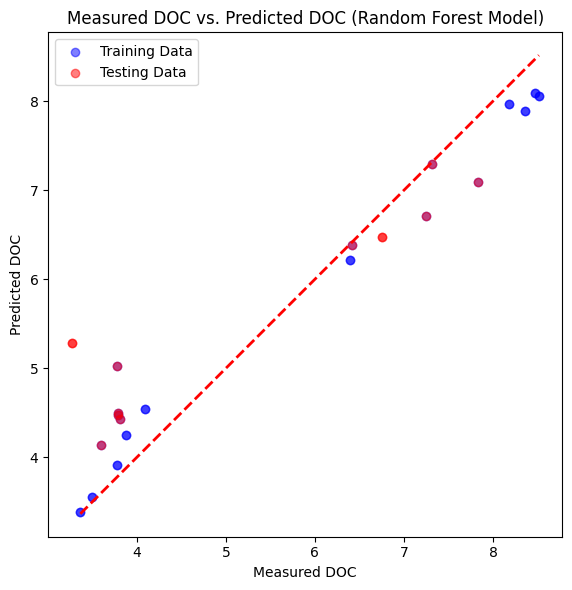

In [35]:
import matplotlib.pyplot as plt

# Create a scatter plot for both training and testing data
plt.figure(figsize=(8, 6))
plt.scatter(data_train['original_DOC'], data_train['predicted_DOC'], c='b', alpha=0.5, label='Training Data')
plt.scatter(data_test['original_DOC'], data_test['predicted_DOC'], c='r', alpha=0.5, label='Testing Data')
plt.title('Measured DOC vs. Predicted DOC (Random Forest Model)')
plt.xlabel('Measured DOC')
plt.ylabel('Predicted DOC')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)
plt.gca().set_aspect('equal')

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# ... (the code for data preprocessing remains the same)

# Initialize the AdaBoostRegressor model
model_name = 'AdaBoost'
model = AdaBoostRegressor(random_state=42)

# Fit the Random Forest model
model.fit(X_train, y_train)

# Predict DOC values for the testing data
y_pred = model.predict(X_test)

# Create DataFrames for the training and testing data with all bands and the predicted values
data_train = X_train.copy()
data_train['original_DOC'] = y_train
data_train['predicted_DOC'] = model.predict(X_train)

data_test = X_test.copy()
data_test['original_DOC'] = y_test
data_test['predicted_DOC'] = y_pred

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

# Display the predicted DOC values for the training and testing data
print(f'*************Predicted Training data ({model_name})***************')
print(data_train)

print(f'*************Predicted Testing data ({model_name})***************')
print(data_test)

# Create a dataframe to store the results
evaluation_df_rf = pd.DataFrame({
    'Model': [model_name],
    'R^2': [r2],
    'MSE': [mse],
    'RMSE': [rmse],
    'MAE': [mae]
})

# Print the dataframe
print('# Bands AS FEATURES 7 day window/n')
print(evaluation_df_rf)


*************Predicted Training data (AdaBoost)***************
           blue     green       red       nir     swir1     swir2  aerosoul  \
16500  0.038437  0.044109  0.043665  0.057373  0.045601  0.037089  0.036336   
16162  0.004022  0.004886  0.002278  0.013054  0.006335  0.003517  0.004300   
17645  0.011728  0.017024  0.016469  0.030795  0.018972  0.013748  0.009925   
17261  0.025311  0.033026  0.031533  0.054482  0.038504  0.028106  0.022633   
16610  0.013462  0.019316  0.012661  0.040090  0.011398  0.005577  0.010994   
16161  0.004022  0.004886  0.002278  0.013054  0.006335  0.003517  0.004300   
16468  0.016637  0.018170  0.012196  0.037532  0.019296  0.011547  0.018145   
17650  0.011728  0.017024  0.016469  0.030795  0.018972  0.013748  0.009925   
16202 -0.001702  0.002638  0.003520  0.010480  0.005708  0.003250 -0.003584   
16608  0.013462  0.019316  0.012661  0.040090  0.011398  0.005577  0.010994   
16240 -0.002794  0.001099  0.001779  0.006327  0.005208  0.003251 -0

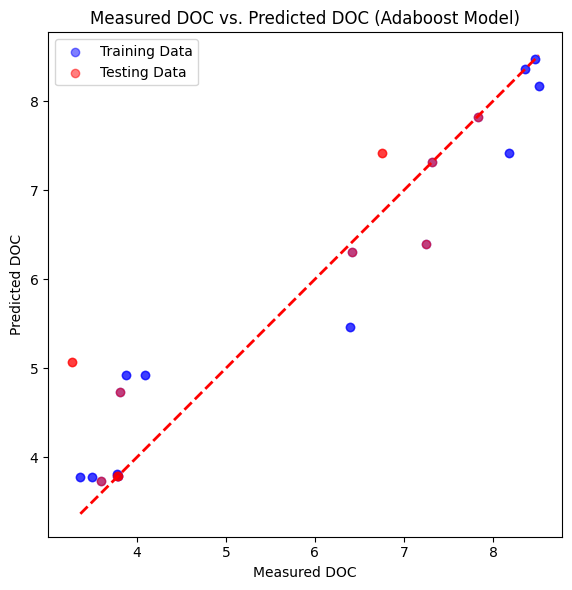

In [37]:
import matplotlib.pyplot as plt

# Create a scatter plot for both training and testing data
plt.figure(figsize=(8, 6))
plt.scatter(data_train['original_DOC'], data_train['predicted_DOC'], c='b', alpha=0.5, label='Training Data')
plt.scatter(data_test['original_DOC'], data_test['predicted_DOC'], c='r', alpha=0.5, label='Testing Data')
plt.title('Measured DOC vs. Predicted DOC (Adaboost Model)')
plt.xlabel('Measured DOC')
plt.ylabel('Predicted DOC')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)
plt.gca().set_aspect('equal')

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [38]:
# Print the size (number of data points) for training and testing data
print(f"Size of Training Data: {len(data_train)} data points")
print(f"Size of Testing Data: {len(data_test)} data points")


Size of Training Data: 29 data points
Size of Testing Data: 13 data points


In [39]:
import pandas as pd

# Assuming df_all_lakes is your DataFrame
#'blue', 'green', 'red', 'nir', 'swir1', 'swir2'
# Reorder the columns as desired
new_order = ['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'aerosoul', 'temp', 'DATE_SMP','SITE_NAME', 'LAKE_LABEL']
df_all_lakes = df_all_lakes[new_order]

# Drop rows with missing values
# df_all_lakes.dropna(inplace=True)


In [40]:
# Extract only the first four bands from the DataFrame
X_TEST = df_all_lakes.iloc[:, :7]

# Print the DataFrame
(X_TEST)

,blue,green,red,nir,swir1,swir2,aerosoul
0,0.004578,0.007558,0.003509,0.006159,0.005849,0.004890,0.003294
3020,0.019678,0.021567,0.014994,0.015742,0.014118,0.012278,0.018456
2695,0.010386,0.016905,0.011150,0.062147,0.032849,0.018224,0.008995
3574,0.014531,0.021026,0.018510,0.037034,0.027464,0.020168,0.010653
2358,0.015905,0.017349,0.014741,0.022455,0.016909,0.012246,0.014847
...,...,...,...,...,...,...,...
2146,0.010601,0.014706,0.013565,0.040663,0.023358,0.012299,0.008235
12915,0.007016,0.011726,0.007945,0.014368,0.007444,0.004200,0.004296
299,0.003078,0.005919,0.001807,0.005984,0.003958,0.002896,0.001206
997,0.004048,0.009661,0.007769,0.015519,0.008565,0.004758,0.000994


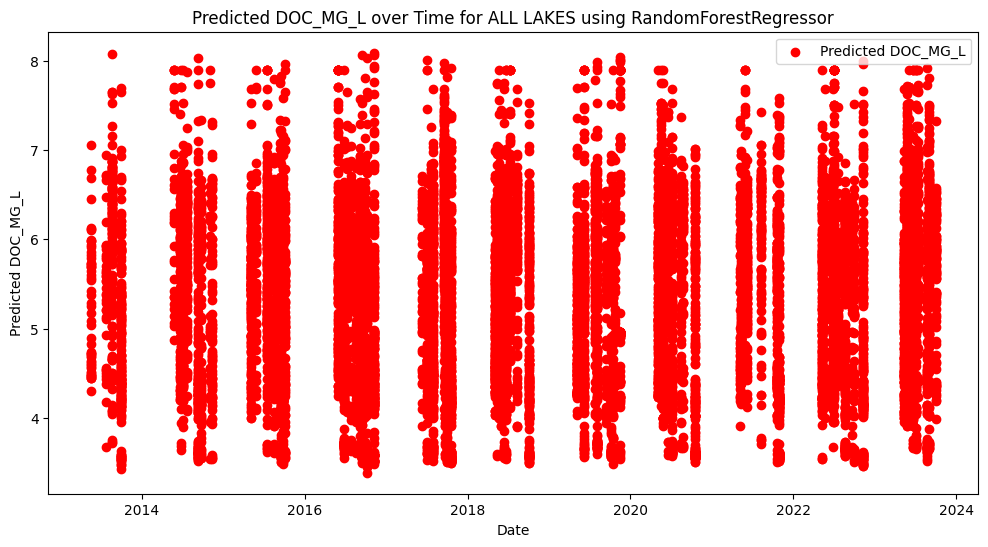

In [41]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor


# Initialize the GradientBoosting
RandomForestRegressor_model = RandomForestRegressor(random_state=42)

RandomForestRegressor_model.fit(X_train, y_train)

# Use the trained model to predict the target variable for the new dataset
predicted_values_all_lakes = RandomForestRegressor_model.predict(X_TEST)



# Assuming 'DOC_MG_L' is the column where you want to store the predictions in 'df_all_lakes'
df_all_lakes['predicted_DOC'] = predicted_values_all_lakes






import matplotlib.pyplot as plt

# Assuming you already have the 'DATE_SMP' column in 'df_all_lakes' (if not, you can add it back)

# Create a copy of the original DataFrame to avoid modifying the original data
df_plot = df_all_lakes.copy()
# Add the predicted values to the DataFrame
df_plot['predicted_DOC'] = predicted_values_all_lakes

# Sort the DataFrame by 'DATE_SMP'
df_plot.sort_values(by='DATE_SMP', inplace=True)

# Filter only the data for 'Big Moose Lake'
#df_plot = df_plot[df_plot['LAKE_LABEL'] == 34]

# Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column
plt.figure(figsize=(12, 6))
plt.scatter(df_plot['DATE_SMP'], df_plot['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
plt.xlabel('Date')
plt.ylabel('Predicted DOC_MG_L')
# plt.ylim(0,6)
plt.title('Predicted DOC_MG_L over Time for ALL LAKES using RandomForestRegressor')
plt.legend()
plt.show()


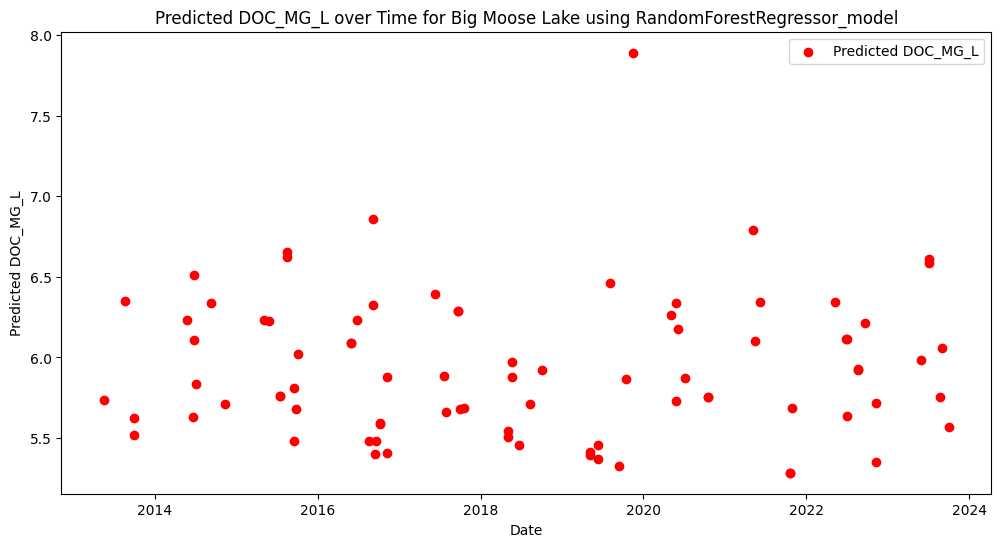

In [42]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor


# Initialize the GradientBoosting
RandomForestRegressor_model =  RandomForestRegressor(random_state=42)

RandomForestRegressor_model.fit(X_train, y_train)

# Use the trained model to predict the target variable for the new dataset
predicted_values_all_lakes = RandomForestRegressor_model.predict(X_TEST)



# Assuming 'DOC_MG_L' is the column where you want to store the predictions in 'df_all_lakes'
df_all_lakes['predicted_DOC'] = predicted_values_all_lakes






import matplotlib.pyplot as plt

# Assuming you already have the 'DATE_SMP' column in 'df_all_lakes' (if not, you can add it back)

# Create a copy of the original DataFrame to avoid modifying the original data
df_plot = df_all_lakes.copy()
# Add the predicted values to the DataFrame
df_plot['predicted_DOC'] = predicted_values_all_lakes

# Sort the DataFrame by 'DATE_SMP'
df_plot.sort_values(by='DATE_SMP', inplace=True)

# Filter only the data for 'Big Moose Lake'
df_plot_BigMOOSELAKE = df_plot[df_plot['LAKE_LABEL'] == 34]

# Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column
plt.figure(figsize=(12, 6))
plt.scatter(df_plot_BigMOOSELAKE['DATE_SMP'], df_plot_BigMOOSELAKE['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
plt.xlabel('Date')
plt.ylabel('Predicted DOC_MG_L')
# plt.ylim(0,6)
plt.title('Predicted DOC_MG_L over Time for Big Moose Lake using RandomForestRegressor_model')
plt.legend()
plt.show()


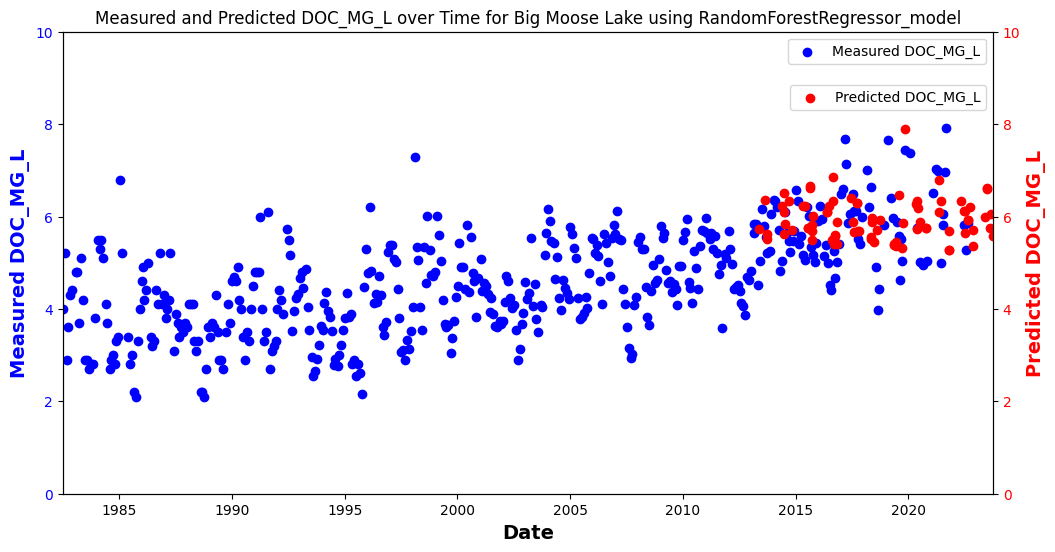

In [43]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

data_modified_BigMOOSELAKE = concatenated_df[concatenated_df['SITE_NAME'] == 'Big Moose Lake']

df_plot_BigMOOSELAKE  = df_plot[df_plot['LAKE_LABEL'] == 34]

# Plot the measured 'DOC_MG_L' values over the 'DATE_SMP' column on the left y-axis
scatter1 = ax1.scatter(data_modified_BigMOOSELAKE['DATE_SMP'], data_modified_BigMOOSELAKE['DOC_MG_L'], label='Measured DOC_MG_L', color='blue')
ax1.set_xlabel('Date', fontweight='bold', fontsize=14)
ax1.set_ylabel('Measured DOC_MG_L', color='blue', fontweight='bold', fontsize=14)  # Adjust font properties here
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column on the right y-axis
scatter2 = ax2.scatter(df_plot_BigMOOSELAKE['DATE_SMP'], df_plot_BigMOOSELAKE['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
ax2.set_ylabel('Predicted DOC_MG_L', color='red', fontweight='bold', fontsize=14)  # Adjust font properties here
ax2.tick_params(axis='y', labelcolor='red')

# Set the x-axis limits for both axes to be the same
x_min = min(data_modified_BigMOOSELAKE['DATE_SMP'].min(), df_plot_BigMOOSELAKE['DATE_SMP'].min())
x_max = max(data_modified_BigMOOSELAKE['DATE_SMP'].max(), df_plot_BigMOOSELAKE['DATE_SMP'].max())

ax1.set_xlim(x_min, x_max)
ax2.set_xlim(x_min, x_max)

y_min = 0
y_max = 10

ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

# Place the legend at the top-right corner of the plot
ax1.legend(loc='upper right')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

plt.title('Measured and Predicted DOC_MG_L over Time for Big Moose Lake using RandomForestRegressor_model')
plt.show()



In [44]:
ee.Initialize()
#ee.Authenticate()

lake_names = ['Middle Pond', 'Jabe Pond', 'Little Jabe Pond', 'Augur Lake', 'Butternut Pond', 'Trout Pond', 'Bartlett pond', 'Raquette Lake Reservoir', 'Heavens Lake', 'Long Pond-Essex', 'Penfield Pond', 'Putnam Pond', 'Grass Pond', 'Windfall Pond', 'Squash Pond', 'Spider Pond', 'Charlotte, Lake', 'Three Ponds', 'Lost Pond', 'Readway Ponds', 'Pansy Pond', 'Kelley Pond', 'Silver Leaf Pond', 'Cooler Pond', 'Duck Pond', 'Mountain Pond', 'Cooper Kill Pond', 'Twin Pond', 'Cranberry Pond', 'Rhododendron Pond', 'Dix Pond', 'Dipper Pond', 'Coffee Pond', 'Berry Pond', 'Upper St. Regis Lake', 'Lower St. Regis Lake', 'Spitfire Lake', 'Schroon Lake', 'Moose Pond', 'Upper Asuable Lake', 'Sagamore Lake', 'Little Wolf Pond', 'Duck Lake', 'Sand Lake', 'Thirteenth Lake', 'Raquette Lake', 'Upper Chateaugay Lake', 'Silver Lake', 'Sprague Pond', 'Middle South Pond', 'Twin Lakes', 'Fourth Lake', 'Long Lake', 'East Pond', 'Dismal Pond', 'New Pond', 'Sheriff Lake', 'Third Lake', 'Hillabrandt Vly', 'South Greek Lake', 'Burntbridge Pond', 'Blake Falls Reservoir', 'Crooked Lake', 'Bear Pond', 'Newberry Pond', 'North Pond', 'Willys Lake', 'Big Deer Pond', 'Sterling Pond', 'Rock Pond', 'Lower Pond', 'Stony Pond', 'Moss Lake', 'Bay Pond', 'Sperry Pond', 'Second Lake', 'Little Safford Lake', 'Salmon Lake', 'Nine Corner Lake', 'Amber Lake', 'Flatfish Pond', 'Mirror Lake', 'Arbutus Pond', 'Mohegan Lake', 'Rondaxe, Lake', 'Lake Algonquin', 'Bog Lake', 'Round Pond', 'Livingston Lake', 'Limekiln Lake', 'Newcomb Lake', 'Eighth Lake', 'Friends Lake', 'Lower Chateaugay Lake',
                 'Park Lake', 'Catlin Lake', 'Little Moose Lake', 'Taylor Pond', 'Cranberry Lake', 'Dry Channel Pond', 'Tenant Lake', 'Sunshine Pond', 'Terror Lake', 'Little Rock Pond', 'Woods Lake', 'Little Green Pond', 'East Pine Pond', 'Duck Hole', 'Beaver Flow', 'Pack Forest Lake', 'Tirrel Pond', 'Irving Pond', 'Queer Lake', 'Hamilton Lake', 'Plumley Pond', 'McRorie Lake', 'Fern Lake', 'Lake Eaton', 'Great Sacandaga Lake', 'Chain Lake', 'Lens Lake', 'Pine Lake', 'Zack Pond', 'Efner Lake', 'Sherman Lake', 'Squaw Lake', 'Wilmurt Lake', 'Sanford Lake', 'Siamese Ponds', 'Valentine Pond', 'Grass River Flow', 'East Caroga Lake', 'West Caroga Lake', 'Kiwassa Lake', 'Lake Flower', 'Oseetah Lake', 'Lower Saranac Lake', 'Shallow Lake', 'Ireland Vly', 'stony Creek Pond', 'Ragged Lake', 'Blue Mountain Lake', 'Eagle Lake', 'Jordan Lake', 'Joe Indian Pond', 'Lake Kushaqua', 'Lake Placid', 'Ferris Lake', 'Charley Pond', 'Dexter Lake', 'Buck Pond', 'Thayer Lake', 'Negro Lake', 'Fish Pond', 'Ingraham Pond', 'Big Bad Luck Pond', 'Trout Lake', 'Big Otter Lake', 'Loon Lake', 'Black Creek Reservoir', 'Big Moose Lake', 'Tupper Lake', 'Simon Pond', 'Floodwood Pond', 'Madawaska Pond', 'White Lake', 'Stewarts Bridge Reservoir', 'North Lake', 'Peck Lake', 'Indian Lake', 'Lewey Lake', 'Little Simon Pond', 'Jones Pond', 'Pyramid Lake', 'Lower Asuable Lake', 'First Lake', 'Twitchell Lake', 'Whitaker Lake', 'Gull Pond', 'Soft Maple Reservoir', 'Oxbow Lake', 'Meacham Lake', 'Hinckley Reservoir', 'Margarite, Lake', 'Cotton Lake', 'White Lead Lake', 'Bullhead Pond', 'Twin Ponds', 'Carr Pond', 'Spring Pond', 'Sochia Pond', 'Marvin Pond', 'Bartlett Pond', 'Drew Pond', 'Line Pond', 'Pickerel Pond', 'Gay Pond', 'Beach Millpond', 'Hopsicker Pond', 'Jackson Pond', 'Deep Lake', 'Figert Lake', 'Tamarack, Lake', 'Little Deer Lake', 'Spoon Lake', 'Hurrell Vly', 'Gid Lake', 'Ginger Pond', 'Pine Pond', 'Dunning Pond', 'Warner Lake', 'Lost Lake', 'Little Lake', 'Ross Lake', 'Motts Flow', 'Conglin Lakes', 'Little Oxbarn Lake', 'Lynus Vly', 'Big Marsh', 'Desert Pond', 'Lone Duck Pond', 'Little Five', 'Washbowl', 'Little Shallow', 'Spruce Pond', 'Schley Pond', 'Blue Pond', 'Wilson Pond', 'Blind Pond', 'Whackers Pond', 'Bens Pond', 'Gourdshell Ponds', 'Margaret, Lake', 'Hidden Pond', 'Hedgehog Pond', 'Spectacle Ponds', 'Gordon Pond', 'Little Pine Pond', 'Coldspring Pond', 'Warren Pond', 'Elm Pond', 'Star Mountain Pond', 'Little Hope Pond', 'Springs, The', 'Dell Pond', 'Elbow Ponds', 'Marsh Pond', 'Lillypad Pond', 'Little Marsh Pond', 'Courtney Pond', 'Holiday Pond', 'Little Meadows', 'Moon Pond', 'Albia Pond', 'Cross Pond', 'Greenfield Lake', 'Little Pond', 'Black Pond', 'Calahan Pond', 'Fuller Pond', 'Martin Pond', 'Densmore Pond', 'Proctor Pond', 'Bumbo Pond', "O'Keefe Pond", 'Poker Pond', 'Barnes Lake', 'Snyders Pond', 'North Branch Lake', 'Burp Lake', 'Stink Lake', 'Blind Mans Vly', 'Lyons Marsh', 'Panther Pond', 'Doe Pond', 'Oswego Pond', 'Grassy Pond', 'Hart Vly Lake', 'Owl Pond', 'Loomis Ponds', 'Scotch Lake', 'White Birch Lake', 'Buck Ponds', 'Grant Lake', 'Shingle Pond', 'High Pond', 'Little Moosehead Pond', 'Harrington Pond', 'McCuen Pond', 'Lilypad Pond', 'Little Rainbow Pond', 'Tom Peck Pond', 'Oncio Pond', 'Charlie Pond', 'Hatch Pond', 'Palmer Lake', 'South Pond', 'Ordway Pond', 'Carter Pond', 'Barnes Pond', 'Stones Pond', 'Faxons Pond', 'Wheeler Pond', 'Icehouse Pond', 'Spectacle Lake', 'Beaver Pond', 'Deer Lake', 'Potter Pond', 'Bills Pond', 'Little Metcalf Lake', 'Home Pond', 'Carry Pond', 'Dry Lake', 'Mud Lake', 'Prairie Lake', 'Little Holmes Lake', 'Little Silver Dawn Lake', 'Hall Lake', 'Orebed Ponds', 'Silver Dawn Lake', 'Little Mouldy Pond', 'Little Otter Pond', 'Hog Pond', 'Tied Lake', 'Big Shallow', 'Sunny Pond', 'Balsam Pond', 'Halfmoon Pond', 'Tomar Pond', 'Little Fish Pond', 'Lone Pond', 'Kettle Pond', 'Little Clear Pond', 'Brandy Pond', 'Partridge Pond', 'Little Moose Pond', 'Upper Cat Pond', 'Middle Cat Pond', 'Sunset Pond', 'Turtle Pond', 'Winch Pond', 'Avalanche Lake', 'Club Pond', 'Bass Lake', 'Daigneau Pond', 'Carpenter Pond', 'Whistle Pond', 'Makomis Pond', 'Jug Pond', 'Drain Pond', 'Shiras Pond', 'Old Pond', 'Buckhorn Ponds', 'Brown Pond', 'Little Sherman Pond', 'Warrens Pond', 'Pat Pond', 'Andrew Pond', 'Upper Reservoir', 'Coon Pond', 'Bennett Pond', 'Cropsey Pond', 'Green Pond', 'Gay, Lake', 'Tom Kettle Lake', 'Curtis Lake', 'Mounts Creek Lake', 'Finches Pond', 'Atwood Lake', 'Reeds Pond', 'Combs Lake', 'Caswell Lake', 'Little Rock Lake', 'Farmers Vly', 'Kan-ac-to, Lake', 'Johns Pond', 'Helms Pond', 'Slim Pond', 'Cellar Pond', 'Dishrag Pond', 'Brown Lake', 'Rock Lake', 'Winter Lake', 'Fisher Vly Lake', 'Big Hill Pond', 'Hyde Pond', 'Wilder Pond', 'Toad Pond', 'Darning Needle Pond', 'Otter Pond', 'Slough Pond', 'Thirtyfive Pond', 'Sunday Pond', 'Lower Cat Pond', 'Dawson Pond', 'Saint Germain Pond', 'Lily Pad Pond', 'Cameras Pond', 'Mountain Ponds', 'Shew Pond', 'Antler Lake', 'Mud Ponds', 'Jerry Pond', 'Stonystep Pond', 'Hotwater Pond', 'Twentyninth Pond', 'Marion Pond', 'Cotters Pond', 'Crab Pond', 'Mink Lake', 'Sylvan Ponds', 'Northrup Lake', 'Wolf Lake', 'Bear Lake', 'Cold Spring', 'Big Metcalf Lake', 'West Creek Lake', 'Black Creek Lake', 'Stony Brook Lake', 'Little Independence Pond', 'Cary Lake', 'Beaverdam Pond', 'Hall Pond', 'Horseshoe Pond', 'Pilgrim Pond', 'Eagles Nest Lake', 'Elk Pond', 'Hamilton Pond', 'Pine Lakes', 'Little Trout Lake', 'Canary Pond', 'Amos Lake', 'Meco Lake', 'Knapp Reservoir', 'Dodge Pond', 'Crystal Lake', 'Emerald Lake', 'Hitchins Pond', 'West Pond', 'Summit Pond', 'Streeter Fishpond', 'Spectacle Pond', 'Glasby Pond', 'Slender Pond', 'Brother Ponds', 'Indian Mountain Pond', 'Whitney Pond', 'Diamond Pond', 'Bone Pond', 'Pink Pond', 'Spring Lake', 'Mosquito Pond', 'Saint Hubert Pond', 'Meadow Pond', 'Big Cherry Patch Pond', 'Cheney Pond', 'Fly Pond', 'Ledge Pond', 'John West Vly', 'Johnnycake Lake', 'Crane Mountain Pond', 'Rankin Pond', 'Center Pond', 'Harrison Marsh', 'Peaked Hill Pond', 'Oxshoe Pond', 'Butler Storage Reservoir', 'Streeter Pond', 'Pleasant Lake', 'Helldiver Pond', 'Sucker Pond', 'Mountain Lake', 'Mica Lakes', 'Split Rock Lake', 'Metcalf Chain of Lakes', 'DeBraine Lake', 'Christian Lake', 'Little Pine Lake', 'Redlouse Lake', 'Little Diamond Pond', 'Higby Twin Ponds', 'Razorback Pond', 'Hess Pond', 'Fifth Lake', 'Owls Head Pond', 'Chub Pond', 'Little High Pond', 'Knapps Long Lake', 'Chartreuse, Lake', 'Broomstick Lake', 'Racker Vly', 'Scuttle Hole', 'Upper South Pond', 'Gal Pond', 'Riley Ponds', 'Muir Pond', 'Simmons Pond', 'Crane Pond', 'Dillon Pond', 'Lem Pond', 'Rainer Pond', 'John Pond', 'Fishpole Pond', 'Triangle Pond', 'Louie Pond', 'French Lake', 'Allen Pond', 'Little Blue Pond', 'Arquett Pond', 'Roiley Pond', 'Antediluvian Pond', 'Robinson Pond', 'Woodbury Pond', 'Shaw Pond', 'Echo Lake', 'Wallface Ponds', 'Catamount Pond', 'Ore Pond', 'Chapel Pond', 'Gui Pond', 'Mulleyville Pond', 'Buck Meadow Flow', 'Pine Mountain Pond', 'Prier Pond', 'Wilkie Reservoir', 'Hidden Lake', 'Number Nine Pond', 'Dippikill Pond', 'Goose Pond', 'Sis Lake', 'Chain Ponds', 'County Line Lake', 'Lanes Pond', 'Greenfield Pond', 'Cowhorn Pond', 'Frank Pond', 'Ormsbee Pond', 'Lower Cascade Lake', 'New Lake', 'Chamber Lake', 'Boyer Lake', 'Green Lake', 'Diana Pond', 'Gull Lakes',
                  'Heath Pond', 'Scott Pond']      
             


# Define the Landsat 5 bands and their corresponding standard names
LC5_BANDS = ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7', 'ST_B6', 'QA_PIXEL']
LC8_BANDS = ['SR_B2','SR_B3','SR_B4',  'SR_B5','SR_B6','SR_B7','SR_B1','ST_B10','QA_PIXEL']; #Landsat 8
STD_NAMES = ['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'aerosoul','temp', 'QA']

all_lakes=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ADK-lakesGT1km2')



# Define a function to mask clouds and cloud shadows from Landsat 5 surface reflectance imagery
def maskL457sr(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)

    qa_values_to_filter = [5440, 5442, 5696, 13664]

    mask = image.select('QA_PIXEL').eq(qa_values_to_filter[0])
    for qa_value in qa_values_to_filter[1:]:
        mask = mask.Or(image.select('QA_PIXEL').eq(qa_value))

    filtered_image = image.updateMask(mask)

    opticalBands = filtered_image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBand = filtered_image.select('ST_B6').multiply(0.00341802).add(-124.15)
    return filtered_image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask).clip(all_lakes)


def maskL8sr(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    
    # Specify the QA values to filter
    qa_values_to_filter = [21824, 21826, 22080, 23888,30048,54596,54852,21952]

    mask = image.select('QA_PIXEL').eq(qa_values_to_filter[0])
    for qa_value in qa_values_to_filter[1:]:
        mask = mask.Or(image.select('QA_PIXEL').eq(qa_value))

    # Apply the mask to filter the image
    filtered_image = image.updateMask(mask)
     # Apply the scaling factors to the appropriate bands.
    opticalBands = filtered_image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBands = filtered_image.select('ST_B.*').multiply(0.00341802).add(-124.15)

    # Replace the original bands with the scaled ones and apply the masks.
    return filtered_image.addBands(opticalBands, None, True) \
        .addBands(thermalBands, None, True) \
        .updateMask(qaMask) \
        .updateMask(saturationMask)\
        .clip(all_lakes)



# Define a function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake):
    reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake_polygon, scale=30).select(STD_NAMES)
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)

# Initialize an empty list to store the dataframes for each lake
dfs = []

# Create a dictionary to map each lake name to a numerical label
lake_name_to_label = {lake_name: i for i, lake_name in enumerate(lake_names)}


# Loop through each lake name and retrieve Landsat 5 imagery for that lake
for SITE_NAME in lake_names:
    # Retrieve the lake using the filter
    lake=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/Centroids-ADK-lakesGT1km2')\
         .filter(ee.Filter.eq('NAME', SITE_NAME))

   
    # Get the latitude and longitude of the station point
    lat = ee.Number(lake.first().geometry().coordinates().get(1)).getInfo()
    lon = ee.Number(lake.first().geometry().coordinates().get(0)).getInfo()

     # Create a polygon around the station point using the latitude and longitude
    #lake_polygon = create_lake_polygon(lon, lat).buffer(1000)
    lake_polygon = ee.Geometry.Point(lon, lat).buffer(100)

    # Retrieve Landsat 5 imagery for the specific lake
    l5 = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2') \
        .filter(ee.Filter.calendarRange(5, 12, 'month')) \
        .filter(ee.Filter.calendarRange(1985, 2011, 'year')) \
        .filterBounds(lake_polygon) \
        .filter(ee.Filter.lt('CLOUD_COVER', 15)) \
        .map(maskL457sr) \
        .select(LC5_BANDS, STD_NAMES)

    l8 =ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
            .filter(ee.Filter.calendarRange(5, 11, 'month')) \
            .filterBounds(lake_polygon) \
            .filter(ee.Filter.lt('CLOUD_COVER', 15)) \
            .map(maskL8sr) \
            .select(LC8_BANDS, STD_NAMES)
        
    # #merge landsat 5 and landsat 8
    # lall = ee.ImageCollection(l5.merge(l8));
    
    # lall_normalized= lall.map(normalize_image)

    # Map the reflectance function over the Landsat 5 ImageCollection for the specific lake
    map_reflectance = l8.map(lambda img: reflectance(img, lake_polygon))

    # Reduce the mapped image collection to get reflectance values for the specific lake
    list_reflectance = map_reflectance.reduceColumns(ee.Reducer.toList(2), ['DATE_SMP', 'reflectance']).values().get(0)

    # Convert the results to a pandas DataFrame
    df_reflectance = pd.DataFrame(list_reflectance.getInfo(), columns=['DATE_SMP', 'reflectance'])
    df_reflectance['DATE_SMP'] = pd.to_datetime(df_reflectance['DATE_SMP'])
    df_reflectance['DATE_SMP'] = df_reflectance['DATE_SMP'].dt.date
    df_reflectance['reflectance'] = df_reflectance['reflectance'].apply(lambda x: {k: v for k, v in x.items() if v is not None})

    # Unpack the 'reflectance' dictionary and create separate columns for each band
    df_reflectance = pd.concat([df_reflectance.drop('reflectance', axis=1),
                                df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)

    # Add a new column for the lake name
    df_reflectance['SITE_NAME'] = SITE_NAME

    # Add a new column for the lake label (numeric representation)
    df_reflectance['LAKE_LABEL'] = lake_name_to_label[SITE_NAME]

    # Add the DataFrame to the list
    dfs.append(df_reflectance)


# Concatenate all DataFrames into a single DataFrame
df_all_lakes_NEW = pd.concat(dfs, ignore_index=True)

# Sort the DataFrame by 'DATE_SMP' in ascending order
df_all_lakes_NEW.sort_values(by='DATE_SMP', inplace=True)

df_all_lakes_NEW.dropna(inplace=True)

df_all_lakes_NEW

#36361 rows × 11 columns

,DATE_SMP,QA,aerosoul,blue,green,nir,red,swir1,swir2,temp,SITE_NAME,LAKE_LABEL
1335,2013-05-16,21824.000000,0.028403,0.029471,0.042718,0.162612,0.040850,0.134195,0.077817,20.699015,Silver Leaf Pond,22
13048,2013-05-16,21912.814545,0.008808,0.010983,0.019557,0.042612,0.014074,0.030752,0.020321,15.360895,Whitaker Lake,177
28918,2013-05-16,21943.262515,0.008092,0.009640,0.015481,0.018866,0.011163,0.012600,0.008517,15.732612,Stony Brook Lake,418
29057,2013-05-16,21938.042777,0.012701,0.014217,0.016335,0.020241,0.011565,0.016142,0.011916,16.081184,Cary Lake,420
12812,2013-05-16,21871.593851,0.018362,0.022286,0.035213,0.083134,0.026585,0.054389,0.033221,16.975398,Pyramid Lake,173
...,...,...,...,...,...,...,...,...,...,...,...,...
10168,2023-10-03,21950.938061,0.004632,0.006472,0.009731,0.016161,0.007823,0.009212,0.005550,20.307413,Ireland Vly,138
24946,2023-10-03,21846.387963,0.003168,0.007963,0.019336,0.103869,0.019856,0.058958,0.027003,23.338149,"Gay, Lake",363
19611,2023-10-03,21906.558435,0.003654,0.008010,0.019171,0.063115,0.019043,0.036642,0.018101,23.308916,Scotch Lake,280
19741,2023-10-03,21894.186855,0.002962,0.008158,0.022876,0.071251,0.021987,0.041000,0.019994,23.336876,Buck Ponds,282


In [45]:
import pandas as pd

# Assuming df_all_lakes is your DataFrame
#'blue', 'green', 'red', 'nir', 'swir1', 'swir2'
# Reorder the columns as desired
new_order = ['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'aerosoul', 'temp', 'DATE_SMP','SITE_NAME', 'LAKE_LABEL']
df_all_lakes_NEW = df_all_lakes_NEW[new_order]

# Drop rows with missing values
# df_all_lakes.dropna(inplace=True)


In [46]:
# Extract only the first four bands from the DataFrame
X_TEST = df_all_lakes_NEW.iloc[:, :7]

# Print the DataFrame
(X_TEST)

,blue,green,red,nir,swir1,swir2,aerosoul
1335,0.029471,0.042718,0.040850,0.162612,0.134195,0.077817,0.028403
13048,0.010983,0.019557,0.014074,0.042612,0.030752,0.020321,0.008808
28918,0.009640,0.015481,0.011163,0.018866,0.012600,0.008517,0.008092
29057,0.014217,0.016335,0.011565,0.020241,0.016142,0.011916,0.012701
12812,0.022286,0.035213,0.026585,0.083134,0.054389,0.033221,0.018362
...,...,...,...,...,...,...,...
10168,0.006472,0.009731,0.007823,0.016161,0.009212,0.005550,0.004632
24946,0.007963,0.019336,0.019856,0.103869,0.058958,0.027003,0.003168
19611,0.008010,0.019171,0.019043,0.063115,0.036642,0.018101,0.003654
19741,0.008158,0.022876,0.021987,0.071251,0.041000,0.019994,0.002962


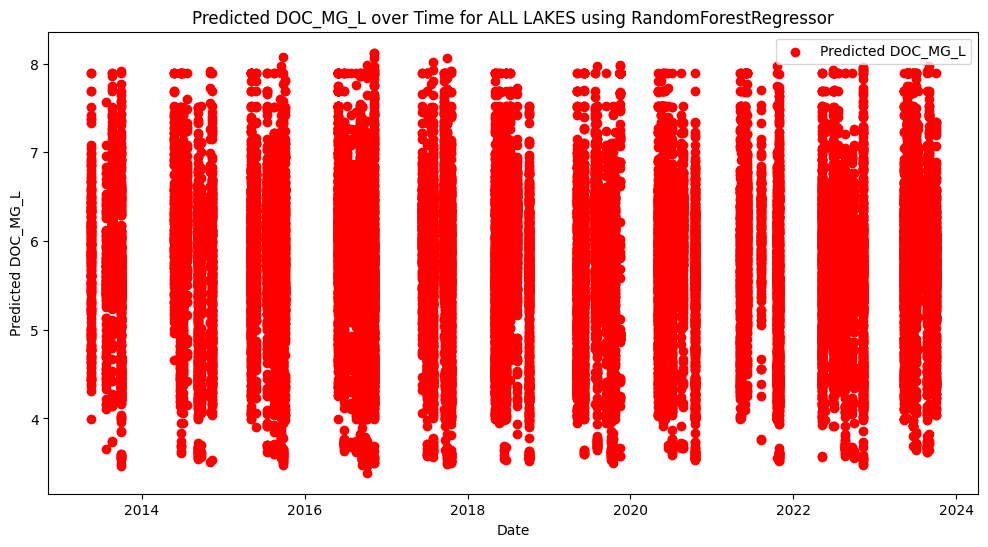

In [47]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor


# Initialize the GradientBoosting
RandomForestRegressor_model = RandomForestRegressor(random_state=42)

RandomForestRegressor_model.fit(X_train, y_train)

# Use the trained model to predict the target variable for the new dataset
predicted_values_all_lakes = RandomForestRegressor_model.predict(X_TEST)



# Assuming 'DOC_MG_L' is the column where you want to store the predictions in 'df_all_lakes'
df_all_lakes_NEW['predicted_DOC'] = predicted_values_all_lakes






import matplotlib.pyplot as plt

# Assuming you already have the 'DATE_SMP' column in 'df_all_lakes' (if not, you can add it back)

# Create a copy of the original DataFrame to avoid modifying the original data
df_plot = df_all_lakes_NEW.copy()
# Add the predicted values to the DataFrame
df_plot['predicted_DOC'] = predicted_values_all_lakes

# Sort the DataFrame by 'DATE_SMP'
df_plot.sort_values(by='DATE_SMP', inplace=True)

# Filter only the data for 'Big Moose Lake'
#df_plot = df_plot[df_plot['LAKE_LABEL'] == 34]

# Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column
plt.figure(figsize=(12, 6))
plt.scatter(df_plot['DATE_SMP'], df_plot['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
plt.xlabel('Date')
plt.ylabel('Predicted DOC_MG_L')
# plt.ylim(0,6)
plt.title('Predicted DOC_MG_L over Time for ALL LAKES using RandomForestRegressor')
plt.legend()
plt.show()


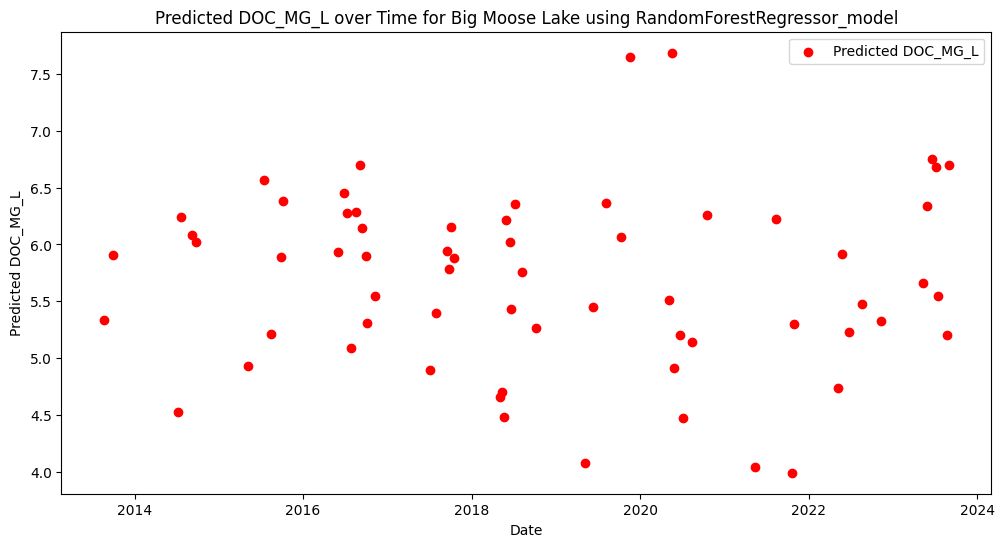

In [48]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor


# Initialize the GradientBoosting
RandomForestRegressor_model =  RandomForestRegressor(random_state=42)

RandomForestRegressor_model.fit(X_train, y_train)

# Use the trained model to predict the target variable for the new dataset
predicted_values_all_lakes = RandomForestRegressor_model.predict(X_TEST)



# Assuming 'DOC_MG_L' is the column where you want to store the predictions in 'df_all_lakes'
df_all_lakes_NEW['predicted_DOC'] = predicted_values_all_lakes






import matplotlib.pyplot as plt

# Assuming you already have the 'DATE_SMP' column in 'df_all_lakes' (if not, you can add it back)

# Create a copy of the original DataFrame to avoid modifying the original data
df_plot = df_all_lakes_NEW.copy()
# Add the predicted values to the DataFrame
df_plot['predicted_DOC'] = predicted_values_all_lakes

# Sort the DataFrame by 'DATE_SMP'
df_plot.sort_values(by='DATE_SMP', inplace=True)

# Filter only the data for 'Big Moose Lake'
df_plot_BigMOOSELAKE = df_plot[df_plot['LAKE_LABEL'] == 34]

# Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column
plt.figure(figsize=(12, 6))
plt.scatter(df_plot_BigMOOSELAKE['DATE_SMP'], df_plot_BigMOOSELAKE['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
plt.xlabel('Date')
plt.ylabel('Predicted DOC_MG_L')
# plt.ylim(0,6)
plt.title('Predicted DOC_MG_L over Time for Big Moose Lake using RandomForestRegressor_model')
plt.legend()
plt.show()


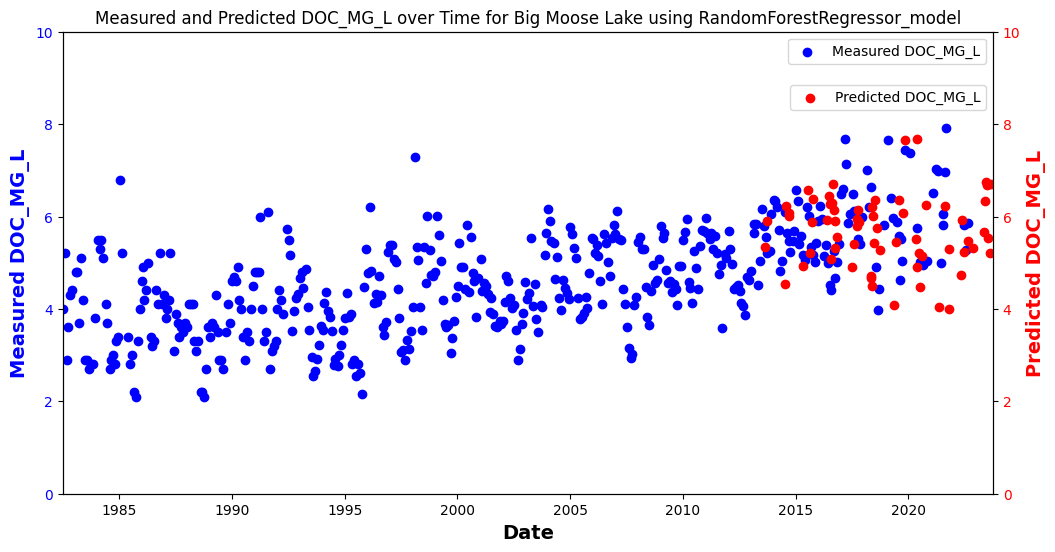

In [49]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

data_modified_BigMOOSELAKE = concatenated_df[concatenated_df['SITE_NAME'] == 'Big Moose Lake']

df_plot_BigMOOSELAKE  = df_plot[df_plot['LAKE_LABEL'] == 34]

# Plot the measured 'DOC_MG_L' values over the 'DATE_SMP' column on the left y-axis
scatter1 = ax1.scatter(data_modified_BigMOOSELAKE['DATE_SMP'], data_modified_BigMOOSELAKE['DOC_MG_L'], label='Measured DOC_MG_L', color='blue')
ax1.set_xlabel('Date', fontweight='bold', fontsize=14)
ax1.set_ylabel('Measured DOC_MG_L', color='blue', fontweight='bold', fontsize=14)  # Adjust font properties here
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column on the right y-axis
scatter2 = ax2.scatter(df_plot_BigMOOSELAKE['DATE_SMP'], df_plot_BigMOOSELAKE['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
ax2.set_ylabel('Predicted DOC_MG_L', color='red', fontweight='bold', fontsize=14)  # Adjust font properties here
ax2.tick_params(axis='y', labelcolor='red')

# Set the x-axis limits for both axes to be the same
# x_min = min(data_modified_BigMOOSELAKE['DATE_SMP'].min(), df_plot_BigMOOSELAKE['DATE_SMP'].min())
# x_max = max(data_modified_BigMOOSELAKE['DATE_SMP'].max(), df_plot_BigMOOSELAKE['DATE_SMP'].max())

ax1.set_xlim(x_min, x_max)
ax2.set_xlim(x_min, x_max)

y_min = 0
y_max = 10

ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

# Place the legend at the top-right corner of the plot
ax1.legend(loc='upper right')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

plt.title('Measured and Predicted DOC_MG_L over Time for Big Moose Lake using RandomForestRegressor_model')
plt.show()



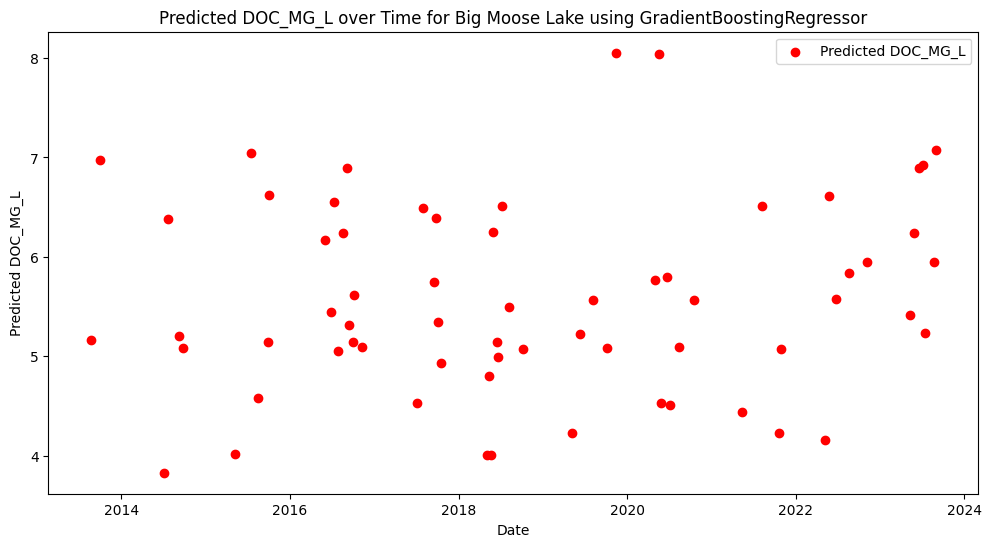

In [50]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Initialize the GradientBoosting
RandomForestRegressor_model =  GradientBoostingRegressor(random_state=42)

RandomForestRegressor_model.fit(X_train, y_train)

# Use the trained model to predict the target variable for the new dataset
predicted_values_all_lakes = RandomForestRegressor_model.predict(X_TEST)



# Assuming 'DOC_MG_L' is the column where you want to store the predictions in 'df_all_lakes'
df_all_lakes_NEW['predicted_DOC'] = predicted_values_all_lakes






import matplotlib.pyplot as plt

# Assuming you already have the 'DATE_SMP' column in 'df_all_lakes' (if not, you can add it back)

# Create a copy of the original DataFrame to avoid modifying the original data
df_plot = df_all_lakes_NEW.copy()
# Add the predicted values to the DataFrame
df_plot['predicted_DOC'] = predicted_values_all_lakes

# Sort the DataFrame by 'DATE_SMP'
df_plot.sort_values(by='DATE_SMP', inplace=True)

# Filter only the data for 'Big Moose Lake'
df_plot_BigMOOSELAKE = df_plot[df_plot['LAKE_LABEL'] == 34]

# Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column
plt.figure(figsize=(12, 6))
plt.scatter(df_plot_BigMOOSELAKE['DATE_SMP'], df_plot_BigMOOSELAKE['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
plt.xlabel('Date')
plt.ylabel('Predicted DOC_MG_L')
# plt.ylim(0,6)
plt.title('Predicted DOC_MG_L over Time for Big Moose Lake using GradientBoostingRegressor')
plt.legend()
plt.show()


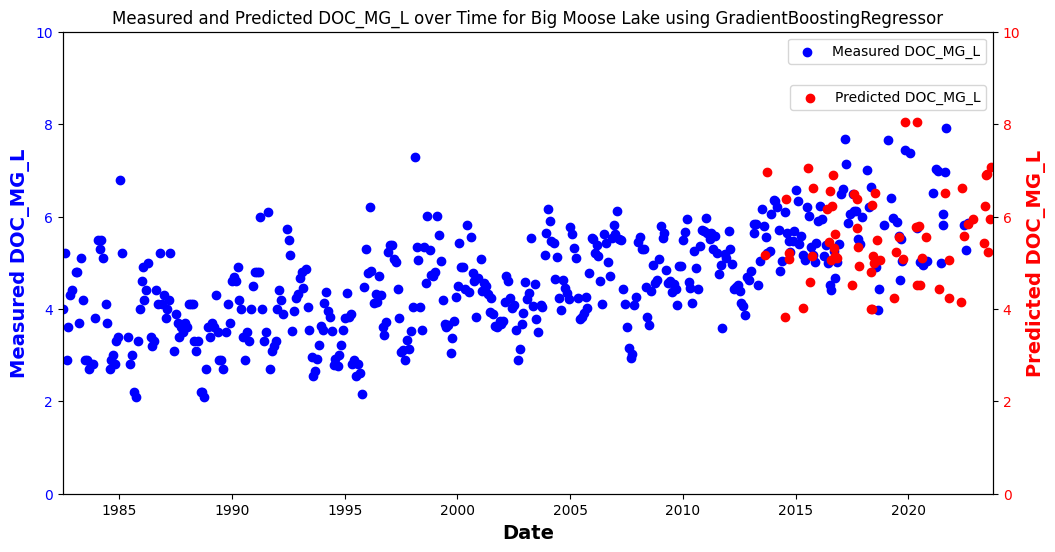

In [51]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

data_modified_BigMOOSELAKE = concatenated_df[concatenated_df['SITE_NAME'] == 'Big Moose Lake']

df_plot_BigMOOSELAKE  = df_plot[df_plot['LAKE_LABEL'] == 34]

# Plot the measured 'DOC_MG_L' values over the 'DATE_SMP' column on the left y-axis
scatter1 = ax1.scatter(data_modified_BigMOOSELAKE['DATE_SMP'], data_modified_BigMOOSELAKE['DOC_MG_L'], label='Measured DOC_MG_L', color='blue')
ax1.set_xlabel('Date', fontweight='bold', fontsize=14)
ax1.set_ylabel('Measured DOC_MG_L', color='blue', fontweight='bold', fontsize=14)  # Adjust font properties here
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column on the right y-axis
scatter2 = ax2.scatter(df_plot_BigMOOSELAKE['DATE_SMP'], df_plot_BigMOOSELAKE['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
ax2.set_ylabel('Predicted DOC_MG_L', color='red', fontweight='bold', fontsize=14)  # Adjust font properties here
ax2.tick_params(axis='y', labelcolor='red')

# Set the x-axis limits for both axes to be the same
# x_min = min(data_modified_BigMOOSELAKE['DATE_SMP'].min(), df_plot_BigMOOSELAKE['DATE_SMP'].min())
# x_max = max(data_modified_BigMOOSELAKE['DATE_SMP'].max(), df_plot_BigMOOSELAKE['DATE_SMP'].max())

ax1.set_xlim(x_min, x_max)
ax2.set_xlim(x_min, x_max)

y_min = 0
y_max = 10

ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

# Place the legend at the top-right corner of the plot
ax1.legend(loc='upper right')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

plt.title('Measured and Predicted DOC_MG_L over Time for Big Moose Lake using GradientBoostingRegressor')
plt.show()

